In [11]:
import os
import numpy as np
import pandas as pd

### Load Data

In [15]:
train_df=pd.read_csv("F:\\DS\\Data-Science-Capstone-Projects-master\\Project_1\\Project 1\\train_RE.csv")
test_df=pd.read_csv("F:\\DS\\Data-Science-Capstone-Projects-master\\Project_1\\Project 1\\test_RE.csv")

In [14]:
train_df.head(5)

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID        state state_ab  \
0  267822      NaN       140        53       36     New York       NY   
1  246444      NaN       140       141       18      Indiana       IN   
2  245683      NaN       140        63       18      Indiana       IN   
3  279653      NaN       140       127       72  Puerto Rico       PR   
4  247218      NaN       140       161       20       Kansas       KS   

         city           place   type  ... female_age_mean  female_age_median  \
0    Hamilton        Hamilton   City  ...        44.48629           45.33333   
1  South Bend        Roseland   City  ...        36.48391           37.58333   
2    Danville        Danville   City  ...        42.15810           42.83333   
3    San Juan        Guaynabo  Urban  ...        47.77526           50.58333   
4   Manhattan  Manhattan City   City  ...        24.17693           21.58333   

   female_age_stdev  female_age_sample_weight  female_age_samples  pct_own  \
0          22.51276                 685.33845              2618.0  0.79046   
1          23.43353                 267.23367              1284.0  0.52483   
2          23.94119                 707.01963              3238.0  0.85331   
3          24.32015                 362.20193              1559.0  0.65037   
4          11.10484                1854.48652              3051.0  0.13046   

   married  married_snp  separated  divorced  
0  0.57851      0.01882    0.01240   0.08770  
1  0.34886      0.01426    0.01426   0.09030  
2  0.64745      0.02830    0.01607   0.10657  
3  0.47257      0.02021    0.02021   0.10106  
4  0.12356      0.00000    0.00000   0.03109  

[5 rows x 80 columns]

In [18]:
print("train:",len(train_df))
print("test:",len(test_df))



train: 27321
test: 11709


In [20]:
train_df.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [21]:
test_df.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

### Figure out the primary key and look for the requirement of indexing.

In [54]:
train_df.nunique()

SUMLEVEL           1
COUNTYID         296
STATEID           52
state             52
state_ab          52
               ...  
pct_own        22302
married        20282
married_snp    10350
separated       6190
divorced       13688
Length: 78, dtype: int64

In [27]:
# The UID has the highest unique value so we can use it as index. So an index can be created from the UID feature
train_df.set_index(keys=['UID'],inplace=True)#Set the DataFrame index using existing columns.
test_df.set_index(keys=['UID'],inplace=True)

### gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

In [38]:
train_df.isnull().sum(axis =0)

BLOCKID        27321
SUMLEVEL           0
COUNTYID           0
STATEID            0
state              0
               ...  
pct_own          268
married          191
married_snp      191
separated        191
divorced         191
Length: 79, dtype: int64

In [39]:
len(train_df.columns[train_df.isnull().sum()>0])

59

In [43]:
# drop blockid has it has no data 
train_df.drop(['BLOCKID'],axis=1, inplace=True)
test_df.drop(['BLOCKID'],axis=1, inplace=True)


In [56]:
nulldata=train_df[train_df.isnull().any(axis=1)]
nulldata

SUMLEVEL  COUNTYID  STATEID          state state_ab         city  \
UID                                                                        
223593       140        19        4        Arizona       AZ       Tucson   
233040       140       101        8       Colorado       CO       Pueblo   
263292       140        13       34     New Jersey       NJ       Newark   
267158       140        47       36       New York       NY     Brooklyn   
292484       140        25       55      Wisconsin       WI      Madison   
...          ...       ...      ...            ...      ...          ...   
266321       140         5       36       New York       NY        Bronx   
235725       140        57       12        Florida       FL        Tampa   
247777       140        61       21       Kentucky       KY  Brownsville   
266166       140         5       36       New York       NY        Bronx   
251078       140        25       25  Massachusetts       MA       Boston   

                    place  type  zip_code  area_code  ...  female_age_mean  \
UID                                                   ...                    
223593         Littletown   CDP     85734        520  ...         40.02370   
233040        Pueblo City  City     81001        719  ...         20.00784   
263292        Silver Lake  City      7107        973  ...         35.47667   
267158      New York City  City     11215        718  ...              NaN   
292484       Madison City  City     53703        608  ...         22.03226   
...                   ...   ...       ...        ...  ...              ...   
266321  Mount Vernon City  City     10458        718  ...         37.43584   
235725       Pebble Creek  City     33647        813  ...         29.08800   
247777   Brownsville City  City     42210        270  ...         19.39847   
266166       Pelham Manor  City     10462        718  ...         37.70543   
251078          Brookline  City      2124        617  ...         38.36136   

        female_age_median  female_age_stdev  female_age_sample_weight  \
UID                                                                     
223593           40.83333           8.49563                  30.01695   
233040           19.25000           4.30291                 172.56153   
263292           35.58333          20.62717                 369.61740   
267158                NaN               NaN                       NaN   
292484           21.08333           5.13435                1365.86300   
...                   ...               ...                       ...   
266321           36.66667          20.24009                 949.65719   
235725           28.08333          14.65116                 144.78344   
247777           19.00000           1.49474                   3.39130   
266166           35.08333          21.49394                 473.55995   
251078           37.50000          17.21372                  41.67597   

        female_age_samples  pct_own  married  married_snp  separated  divorced  
UID                                                                             
223593               161.0      NaN  0.16308      0.16308    0.02634   0.20499  
233040               309.0  0.00000  0.00000      0.00000    0.00000   0.00000  
263292              1671.0  0.24002  0.37411      0.05579    0.02504   0.07654  
267158                 NaN      NaN      NaN          NaN        NaN       NaN  
292484              1981.0  0.00000  0.00773      0.00000    0.00000   0.01160  
...                    ...      ...      ...          ...        ...       ...  
266321              3921.0  0.07254  0.42468      0.07456    0.03217   0.08100  
235725               648.0  0.00000  0.25806      0.10753    0.10753   0.09946  
247777                 6.0      NaN  0.00000      0.00000    0.00000   0.00000  
266166              2061.0  0.06311  0.51284      0.08899    0.03211   0.02844  
251078                96.0      NaN  0.15530      0.15530    0.13258   0.10985  



In [50]:
round((736/27321)*100,3)

2.694

In [51]:
#Only 2.69% of the data has null values, thus it is safe to delete all rows

In [ ]:
#drop "Primary" column as it has no variance  and has nly one value

In [55]:
train_df.drop(['primary'],axis=1, inplace=True)
test_df.drop(['primary'],axis=1, inplace=True)

In [58]:
train_df=pd.concat([train_df,nulldata, nulldata]).drop_duplicates(keep=False)

In [59]:
train_df.shape

(26585, 77)

In [60]:
len(train_df.columns[train_df.isnull().sum() >0])

0

### Week 1, Exploratory Data Analysis (EDA):

#### Perform debt analysis. You may take the following steps: a) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

In [62]:
pip install pandasql

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=19395299f9a46e9ad0ce5acb676a640fd61c182f6799987ec00d90ace6e43580
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\63\e8\ec\75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql
Note: you may need to restart the kernel to use updated packages.


In [63]:
from pandasql import sqldf

In [131]:
q1 = "select place,pct_own,second_mortgage,city,lat,lng,home_equity from train_df where pct_own >0.10 and second_mortgage <0.5 order by second_mortgage DESC LIMIT 2500;"
pysqldf = lambda q: sqldf(q, globals())
df_train_location_mort_pct=pysqldf(q1)

In [132]:

df_train_location_mort_pct.head()

place  pct_own  second_mortgage         city        lat  \
0   Worcester City  0.20247          0.43363    Worcester  42.254262   
1     Harbor Hills  0.15618          0.31818       Corona  40.751809   
2      Glen Burnie  0.22380          0.30212  Glen Burnie  39.127273   
3  Egypt Lake-leto  0.11618          0.28972        Tampa  28.029063   
4      Lincolnwood  0.14228          0.28899      Chicago  41.967289   

         lng  home_equity  
0 -71.800347      0.43363  
1 -73.853582      0.40341  
2 -76.635265      0.35689  
3 -82.495395      0.38785  
4 -87.652434      0.40826

In [67]:
import plotly.express as px
import plotly.graph_objects as go

In [68]:
fig = go.Figure(data=go.Scattergeo(
    lat = df_train_location_mort_pct['lat'],
    lon = df_train_location_mort_pct['lng']),
    )
fig.update_layout(
    geo=dict(
        scope = 'north america',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation_lon = -100
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title='Top 2,500 locations with second mortgage is the highest and percent ownership is above 10 percent')
fig.show()

### Use the following bad debt equation:

#### Bad Debt = P (Second Mortgage ∩ Home Equity Loan)
#### Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage

In [69]:
train_df['bad_debt']=train_df['second_mortgage']+train_df['home_equity']-train_df['home_equity_second_mortgage']

### Create pie charts  to show overall debt and bad debt

In [72]:
#Plotting Libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)


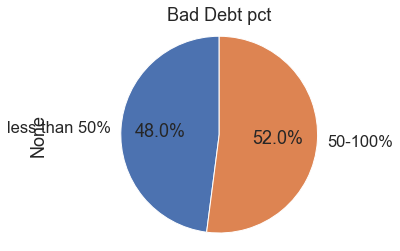

In [79]:

train_df['bins'] = pd.cut(train_df['bad_debt'],bins=[0,0.10,1], labels=["less than 50%","50-100%"])
train_df.groupby(['bins']).size().plot(kind='pie',subplots=True,startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Bad Debt pct')
plt.show()

### Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

In [82]:
train_df.columns

Index(['SUMLEVEL', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater', 'pop',
       'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male',

In [89]:
#Taking Hamilton and Manhattan cities data
#cols=['second_mortgage','home_equity','debt','bad_debt']
df_box_hamilton=train_df.loc[train_df['city'] == 'Hamilton']
df_box_manhattan=train_df.loc[train_df['city'] == 'Manhattan']
df_box_city=pd.concat([df_box_hamilton,df_box_manhattan])
df_box_city.head(4)


SUMLEVEL  COUNTYID  STATEID        state state_ab      city  \
UID                                                                   
267822       140        53       36     New York       NY  Hamilton   
263797       140        21       34   New Jersey       NJ  Hamilton   
270979       140        17       39         Ohio       OH  Hamilton   
259028       140        95       28  Mississippi       MS  Hamilton   

                place     type  zip_code  area_code  ...  \
UID                                                  ...   
267822       Hamilton     City     13346        315  ...   
263797      Yardville     City      8610        609  ...   
270979  Hamilton City  Village     45015        513  ...   
259028       Hamilton      CDP     39746        662  ...   

        female_age_sample_weight  female_age_samples  pct_own  married  \
UID                                                                      
267822                 685.33845              2618.0  0.79046  0.57851   
263797                 732.58443              3124.0  0.64400  0.56377   
270979                 565.32725              2528.0  0.61278  0.47397   
259028                 483.01311              1954.0  0.83241  0.58678   

        married_snp  separated  divorced  bad_debt  bins_bad_debt  \
UID                                                                 
267822      0.01882    0.01240   0.08770   0.09408  less than 10%   
263797      0.01980    0.00990   0.04892   0.18071         10-50%   
270979      0.04419    0.02663   0.13741   0.15005         10-50%   
259028      0.01052    0.00000   0.11721   0.02130  less than 10%   

                 bins  
UID                    
267822  less than 50%  
263797        50-100%  
270979        50-100%  
259028  less than 50%  

[4 rows x 80 columns]

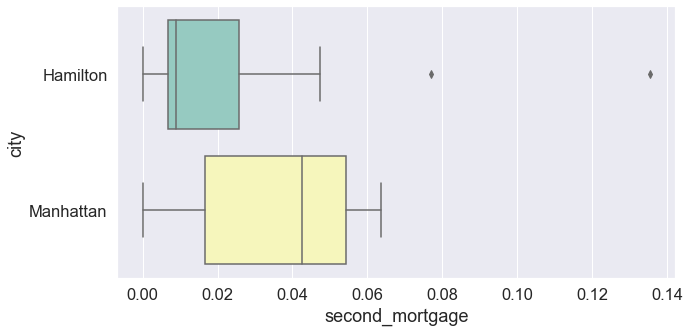

In [88]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='second_mortgage', y='city',width=0.8,palette="Set3")
plt.show()

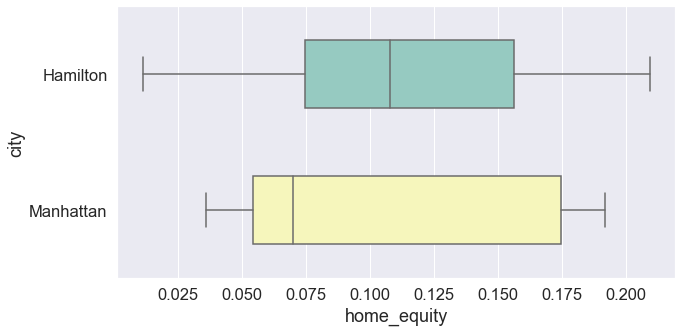

In [90]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='home_equity', y='city',width=0.5,palette="Set3")
plt.show()


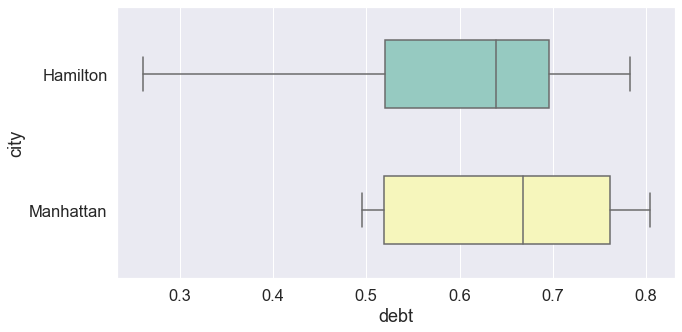

In [91]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='debt', y='city',width=0.5,palette="Set3")
plt.show()

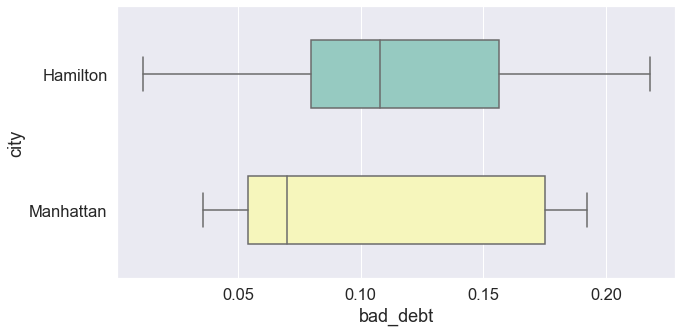

In [92]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='bad_debt', y='city',width=0.5,palette="Set3")
plt.show()

In [98]:
settings:  { "notebook.output.textLineLimit": 500 }

In [135]:
cities=train_df['city'].value_counts()[:30].index

In [136]:
boxplot_df = df_train_location_mort_pct[df_train_location_mort_pct['city'].isin (cities)]

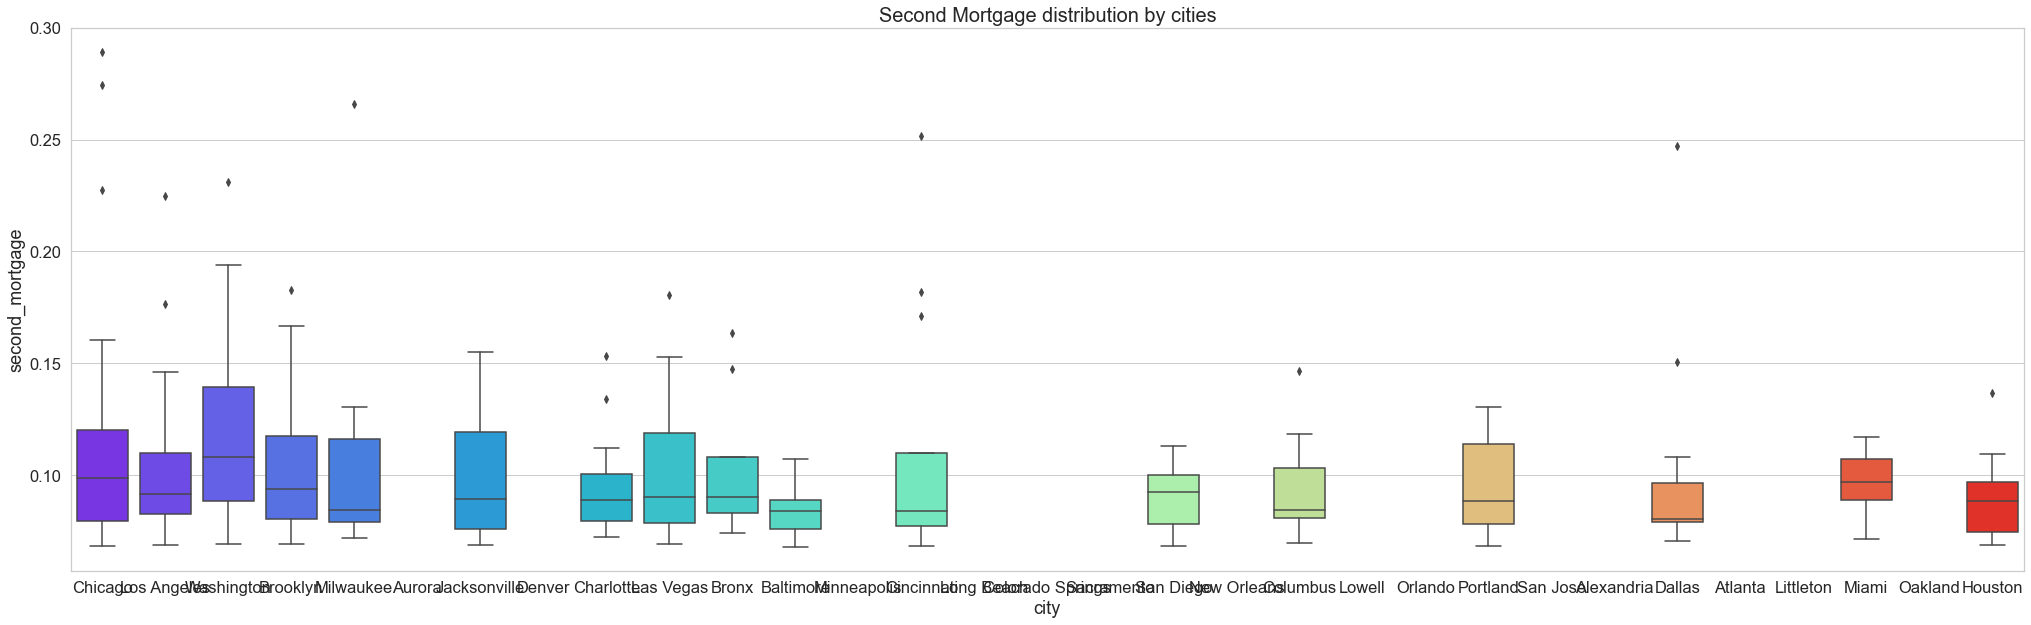

In [129]:
sns.set_style("whitegrid")

plt.figure(figsize = (35, 10))
sns.boxplot(x='city',y='second_mortgage',data=boxplot_df,palette='rainbow', order = ['Chicago', 'Los Angeles', 'Washington', 'Brooklyn',
                  'Milwaukee', 'Aurora', 'Jacksonville', 'Denver', 'Charlotte',
                  'Las Vegas', 'Bronx', 'Baltimore', 'Minneapolis',
                  'Cincinnati', 'Long Beach', 'Colorado Springs', 'Sacramento',
                  'San Diego', 'New Orleans', 'Columbus', 'Lowell', 'Orlando',
                  'Portland', 'San Jose', 'Alexandria', 'Dallas', 'Atlanta',
                  'Littleton', 'Miami', 'Oakland', 'Houston']).set_title('Second Mortgage distribution by cities', fontsize = 20)
plt.show()


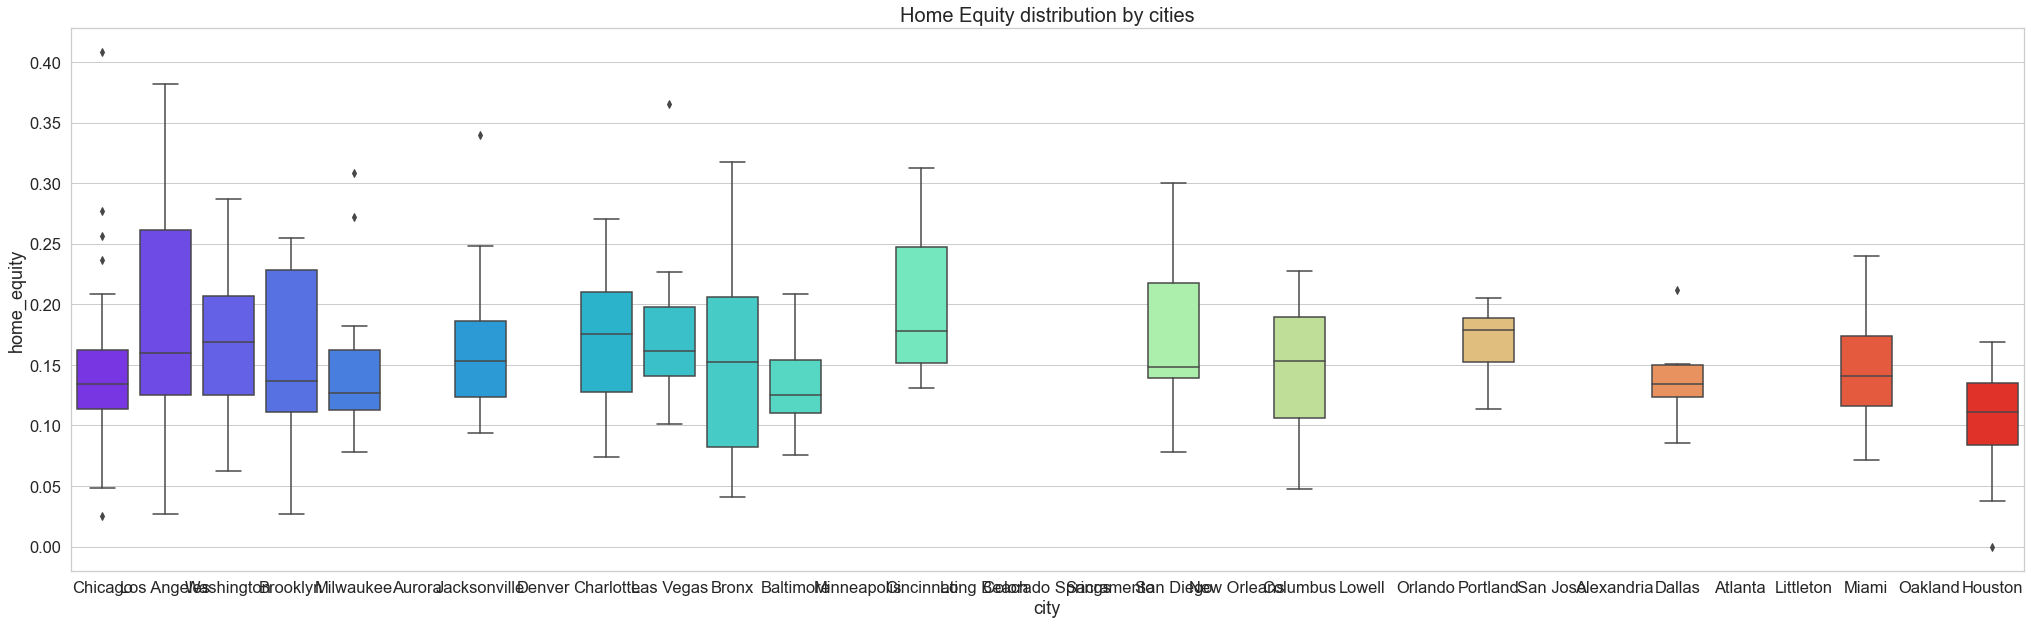

In [137]:
sns.set_style("whitegrid")

plt.figure(figsize = (35, 10))
sns.boxplot(x='city',y='home_equity',data=boxplot_df,palette='rainbow', order = ['Chicago', 'Los Angeles', 'Washington', 'Brooklyn',
                  'Milwaukee', 'Aurora', 'Jacksonville', 'Denver', 'Charlotte',
                  'Las Vegas', 'Bronx', 'Baltimore', 'Minneapolis',
                  'Cincinnati', 'Long Beach', 'Colorado Springs', 'Sacramento',
                  'San Diego', 'New Orleans', 'Columbus', 'Lowell', 'Orlando',
                  'Portland', 'San Jose', 'Alexandria', 'Dallas', 'Atlanta',
                  'Littleton', 'Miami', 'Oakland', 'Houston']).set_title('Home Equity distribution by cities', fontsize = 20)
plt.show()

### e) Create a collated income distribution chart for family income, house hold income, and remaining income

F:\Py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



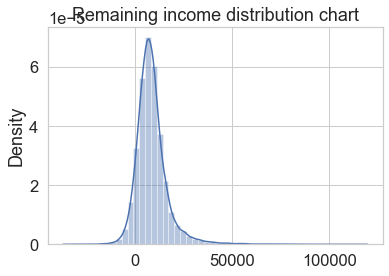

In [139]:
sns.distplot(train_df['family_mean']-train_df['hi_mean'])
plt.title('Remaining income distribution chart')
plt.show()

F:\Py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



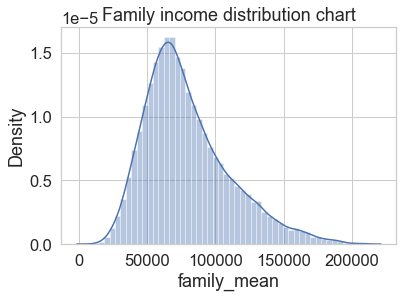

In [140]:
sns.distplot(train_df['family_mean'])
plt.title('Family income distribution chart')
plt.show()


F:\Py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



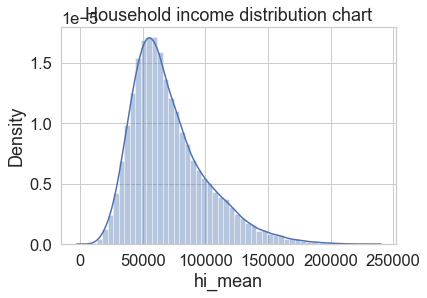

In [142]:
sns.distplot(train_df['hi_mean'])
plt.title('Household income distribution chart')
plt.show()


### 1. Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements):

#### a) Use pop and ALand variables to create a new field called population density.
#### b) Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age.
#### c) Visualize the findings using appropriate chart type

In [143]:
density_df = train_df[['state', 'city', 'place', 'ALand', 'pop', 'male_age_median', 'female_age_median', 'male_pop', 'female_pop']]
density_df.head()

state        city           place        ALand   pop  \
UID                                                                  
267822     New York    Hamilton        Hamilton  202183361.0  5230   
246444      Indiana  South Bend        Roseland    1560828.0  2633   
245683      Indiana    Danville        Danville   69561595.0  6881   
279653  Puerto Rico    San Juan        Guaynabo    1105793.0  2700   
247218       Kansas   Manhattan  Manhattan City    2554403.0  5637   

        male_age_median  female_age_median  male_pop  female_pop  
UID                                                               
267822         44.00000           45.33333      2612        2618  
246444         32.00000           37.58333      1349        1284  
245683         40.83333           42.83333      3643        3238  
279653         48.91667           50.58333      1141        1559  
247218         22.41667           21.58333      2586        3051

In [144]:
#median
density_df['median_age'] = (density_df['male_age_median'] *  density_df['male_pop'] + density_df['female_age_median'] *  density_df['female_pop'])  / density_df['pop']
density_df.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_5480\3403515333.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



state        city           place        ALand   pop  \
UID                                                                  
267822     New York    Hamilton        Hamilton  202183361.0  5230   
246444      Indiana  South Bend        Roseland    1560828.0  2633   
245683      Indiana    Danville        Danville   69561595.0  6881   
279653  Puerto Rico    San Juan        Guaynabo    1105793.0  2700   
247218       Kansas   Manhattan  Manhattan City    2554403.0  5637   

        male_age_median  female_age_median  male_pop  female_pop  median_age  
UID                                                                           
267822         44.00000           45.33333      2612        2618   44.667430  
246444         32.00000           37.58333      1349        1284   34.722748  
245683         40.83333           42.83333      3643        3238   41.774472  
279653         48.91667           50.58333      1141        1559   49.879012  
247218         22.41667           21.58333      2586        3051   21.965629

In [145]:
#pop_density
density_df['pop_density'] = density_df['pop'] / density_df['ALand']
density_df.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_5480\144110077.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



state        city           place        ALand   pop  \
UID                                                                  
267822     New York    Hamilton        Hamilton  202183361.0  5230   
246444      Indiana  South Bend        Roseland    1560828.0  2633   
245683      Indiana    Danville        Danville   69561595.0  6881   
279653  Puerto Rico    San Juan        Guaynabo    1105793.0  2700   
247218       Kansas   Manhattan  Manhattan City    2554403.0  5637   

        male_age_median  female_age_median  male_pop  female_pop  median_age  \
UID                                                                            
267822         44.00000           45.33333      2612        2618   44.667430   
246444         32.00000           37.58333      1349        1284   34.722748   
245683         40.83333           42.83333      3643        3238   41.774472   
279653         48.91667           50.58333      1141        1559   49.879012   
247218         22.41667           21.58333      2586        3051   21.965629   

        pop_density  
UID                  
267822     0.000026  
246444     0.001687  
245683     0.000099  
279653     0.002442  
247218     0.002207

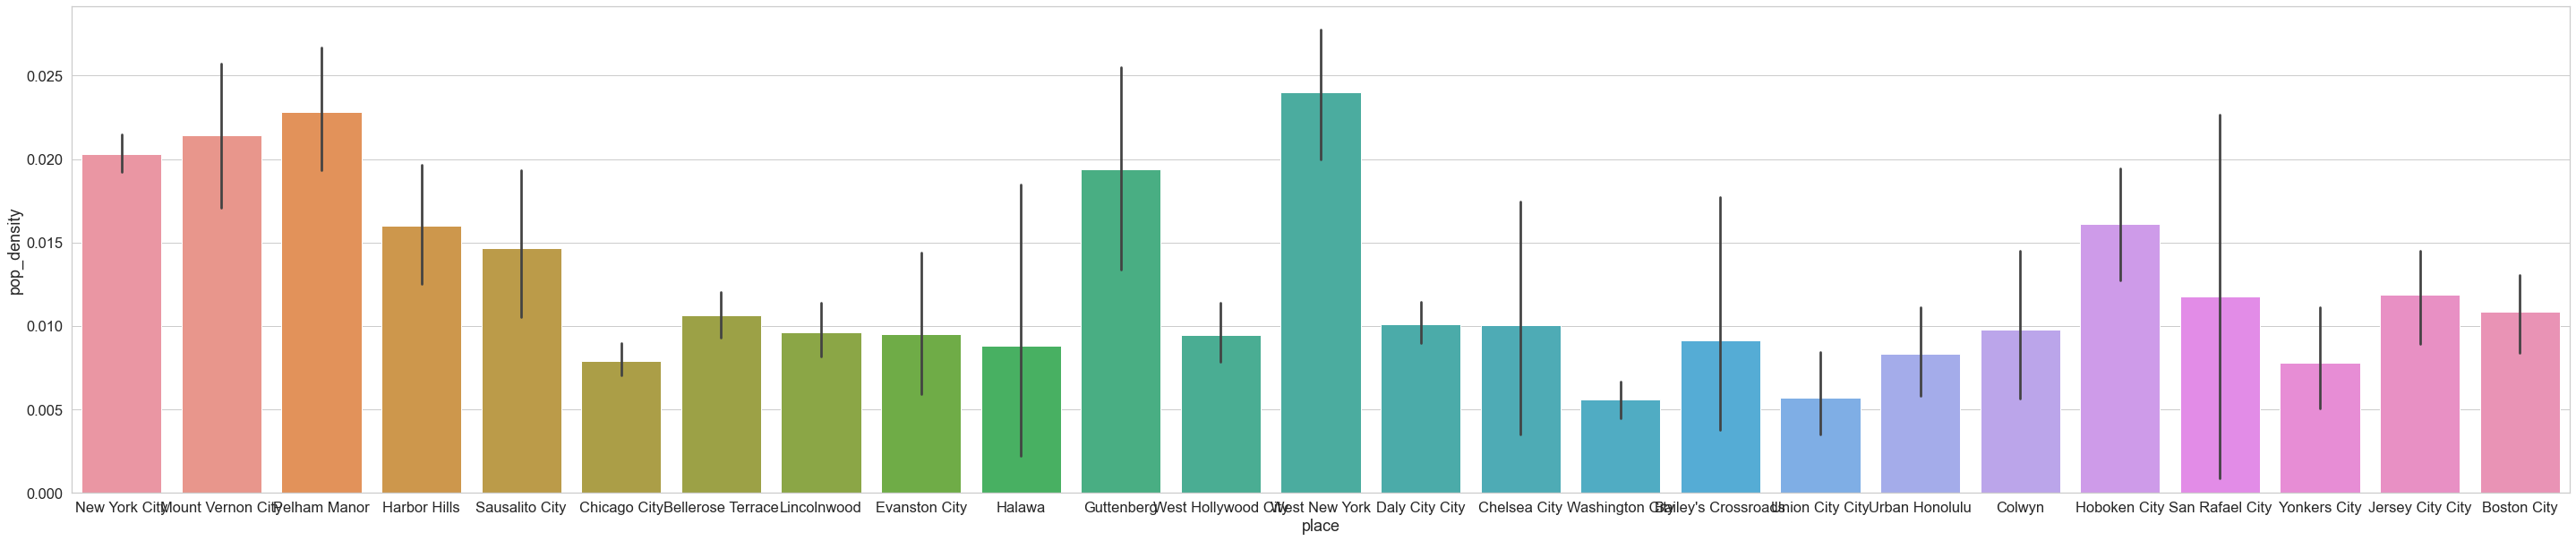

In [168]:

sns.barplot(x = 'place',
            y = 'pop_density',
            data = density_df.nlargest(26585, 'pop_density'),
            
            order = ['New York City',
 'Mount Vernon City',
 'Pelham Manor',
 'Harbor Hills',
 'Sausalito City',
 'Chicago City',
 'Bellerose Terrace',
 'Lincolnwood',
 'Evanston City',
 'Halawa',
 'Guttenberg',
 'West Hollywood City',
 'West New York',
 'Daly City City',
 'Chelsea City',
 'Washington City',
 "Bailey's Crossroads",
 'Union City City',
 'Urban Honolulu',
 'Colwyn',
 'Hoboken City',
 'San Rafael City',
 'Yonkers City',
 'Jersey City City',
 'Boston City'])

#fig, ax = plt.subplots(figsize=(6, 6))
 
# Show the plot

plt.gcf().set_size_inches(50,10)
plt.show()

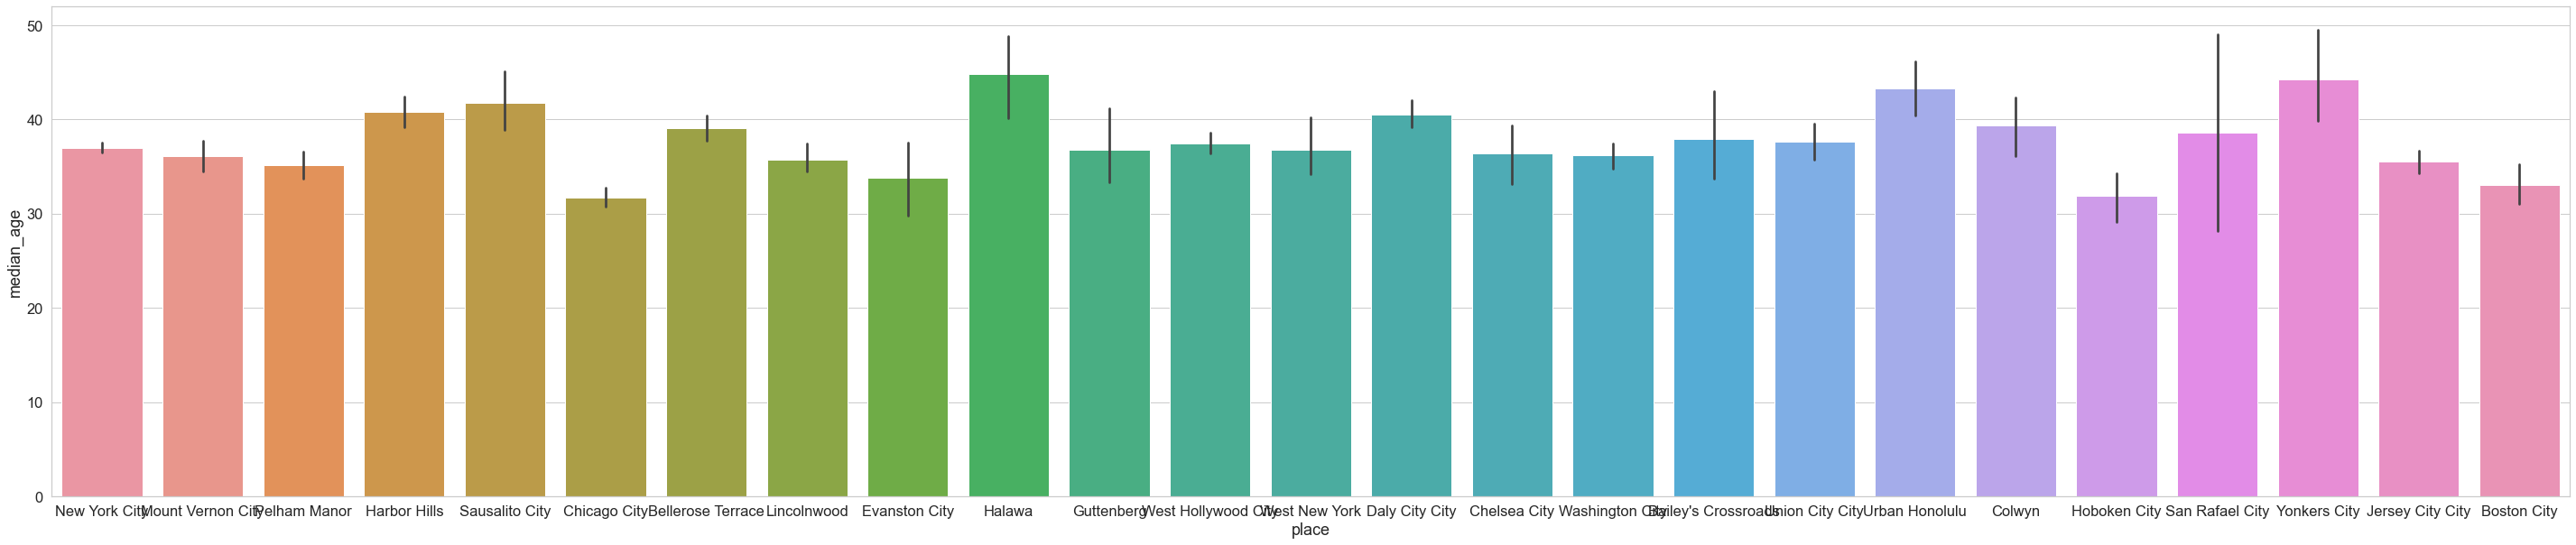

In [163]:
#median age:

sns.barplot(x = 'place',
            y = 'median_age',
            data = density_df.nlargest(26585, 'median_age'),
            
            order = ['New York City',
 'Mount Vernon City',
 'Pelham Manor',
 'Harbor Hills',
 'Sausalito City',
 'Chicago City',
 'Bellerose Terrace',
 'Lincolnwood',
 'Evanston City',
 'Halawa',
 'Guttenberg',
 'West Hollywood City',
 'West New York',
 'Daly City City',
 'Chelsea City',
 'Washington City',
 "Bailey's Crossroads",
 'Union City City',
 'Urban Honolulu',
 'Colwyn',
 'Hoboken City',
 'San Rafael City',
 'Yonkers City',
 'Jersey City City',
 'Boston City'])

#fig, ax = plt.subplots(figsize=(6, 6))
 
# Show the plot
#sns.barplot(x, y, ax=ax)
plt.gcf().set_size_inches(50,10)
plt.show()

### Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

#### Analyze the married, separated, and divorced population for these population brackets

#### Visualize using appropriate chart type

In [170]:
age_df = train_df[['state','city', 'place', 'pop', 'male_pop', 'female_pop', 'male_age_median', 'female_age_median', 'married', 'separated', 'divorced']]
age_df

state         city             place    pop  male_pop  \
UID                                                                    
267822      New York     Hamilton          Hamilton   5230      2612   
246444       Indiana   South Bend          Roseland   2633      1349   
245683       Indiana     Danville          Danville   6881      3643   
279653   Puerto Rico     San Juan          Guaynabo   2700      1141   
247218        Kansas    Manhattan    Manhattan City   5637      2586   
...              ...          ...               ...    ...       ...   
279212   Puerto Rico        Coamo             Coamo   1847       909   
277856  Pennsylvania    Blue Bell         Blue Bell   4155      2116   
233000      Colorado      Weldona      Saddle Ridge   2829      1465   
287425         Texas  Colleyville  Colleyville City  11542      5727   
265371        Nevada    Las Vegas          Paradise   3726      1815   

        female_pop  male_age_median  female_age_median  married  separated  \
UID                                                                          
267822        2618         44.00000           45.33333  0.57851    0.01240   
246444        1284         32.00000           37.58333  0.34886    0.01426   
245683        3238         40.83333           42.83333  0.64745    0.01607   
279653        1559         48.91667           50.58333  0.47257    0.02021   
247218        3051         22.41667           21.58333  0.12356    0.00000   
...            ...              ...                ...      ...        ...   
279212         938         41.66667           40.16667  0.24603    0.02249   
277856        2039         38.83333           39.50000  0.61127    0.02473   
233000        1364         42.00000           46.33333  0.70451    0.00520   
287425        5815         46.66667           43.41667  0.75503    0.00915   
265371        1911         32.50000           29.83333  0.34426    0.03005   

        divorced  
UID               
267822   0.08770  
246444   0.09030  
245683   0.10657  
279653   0.10106  
247218   0.03109  
...          ...  
279212   0.14683  
277856   0.04888  
233000   0.07712  
287425   0.05261  
265371   0.13320  

[26585 rows x 11 columns]

### The IntelliSense Age Group defaults are:

### Youth (<18)

### Young Adult (18 to 35)

### Adult (36 to 55)

### Senior (56 and up)

In [171]:
## bins
bins = [0, 12,18, 35, 55, 100]
labels = ['kids', 'Youth', 'Young Adult', 'Adult', 'Senior']

In [172]:
age_df['male_population_bracket'] = pd.cut(age_df['male_age_median'], bins, labels = labels)
age_df['female_population_bracket'] = pd.cut(age_df['female_age_median'], bins, labels = labels)

C:\Users\ACER\AppData\Local\Temp\ipykernel_5480\1360096882.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ACER\AppData\Local\Temp\ipykernel_5480\1360096882.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



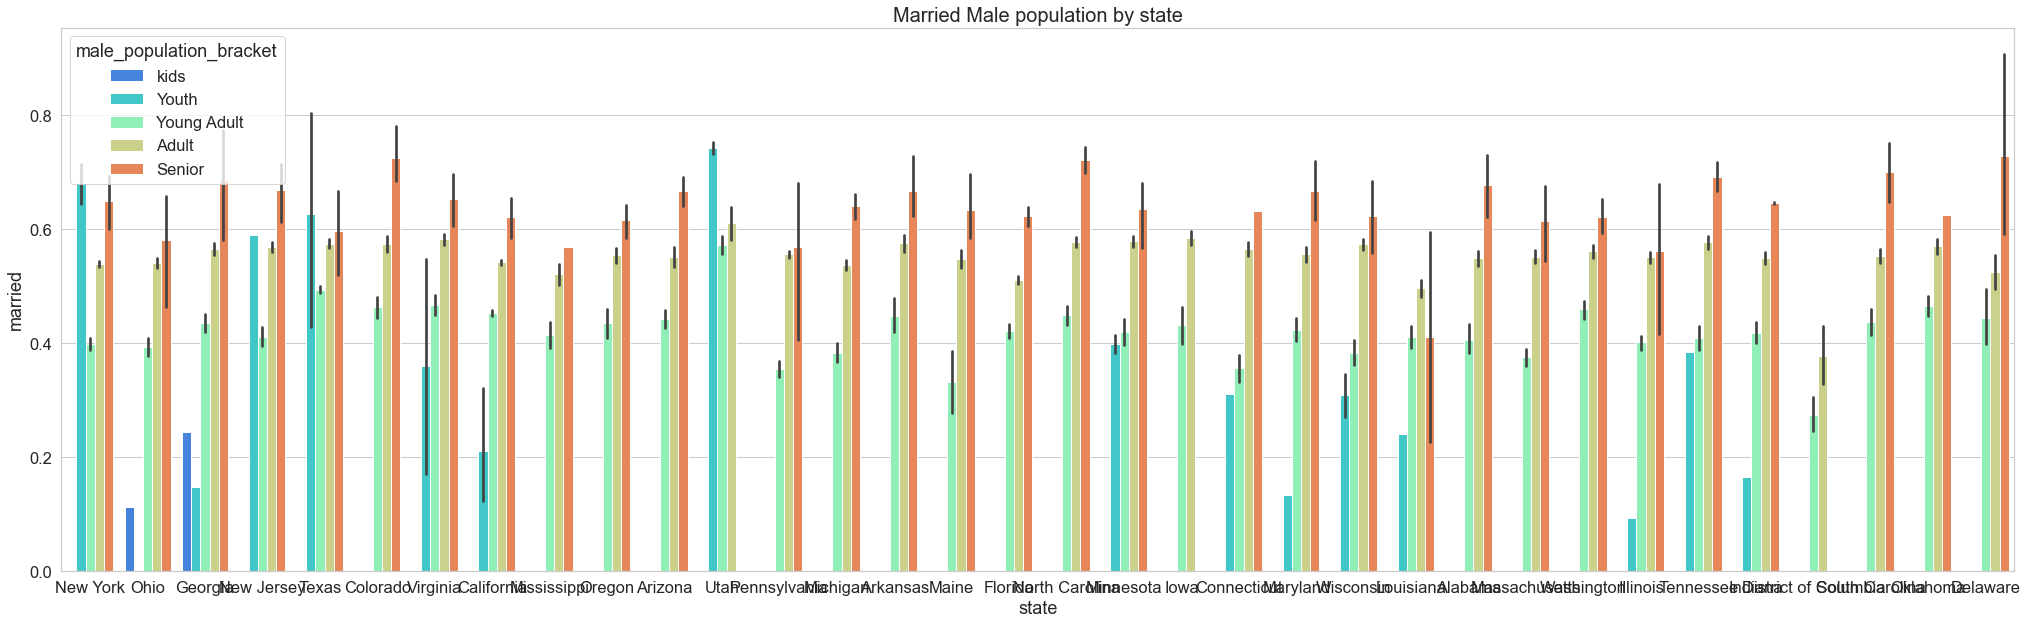

In [174]:
sns.set_style("whitegrid")

plt.figure(figsize = (35, 10))

ax = sns.barplot(x = 'state', y = 'married', hue = 'male_population_bracket', data = age_df, palette="rainbow", 
           order = ['New York', 'Ohio', 'Georgia', 'New Jersey', 'Texas', 'Colorado', 'Virginia', 'California', 'Mississippi', 'Oregon', 'Arizona', 'Utah', 'Pennsylvania', 'Michigan', 'Arkansas', 'Maine', 'Florida', 'North Carolina', 
                     'Minnesota', 'Iowa', 'Connecticut', 'Maryland', 'Wisconsin', 'Louisiana', 'Alabama', 'Massachusetts', 'Washington', 'Illinois', 'Tennessee', 'Indiana', 'District of Columbia', 'South Carolina', 'Oklahoma', 'Delaware'])

ax.set_title('Married Male population by state', fontsize = 20)

plt.show()

#### Surprisingly, "Ohio & Georgia" have Married Male KIDS

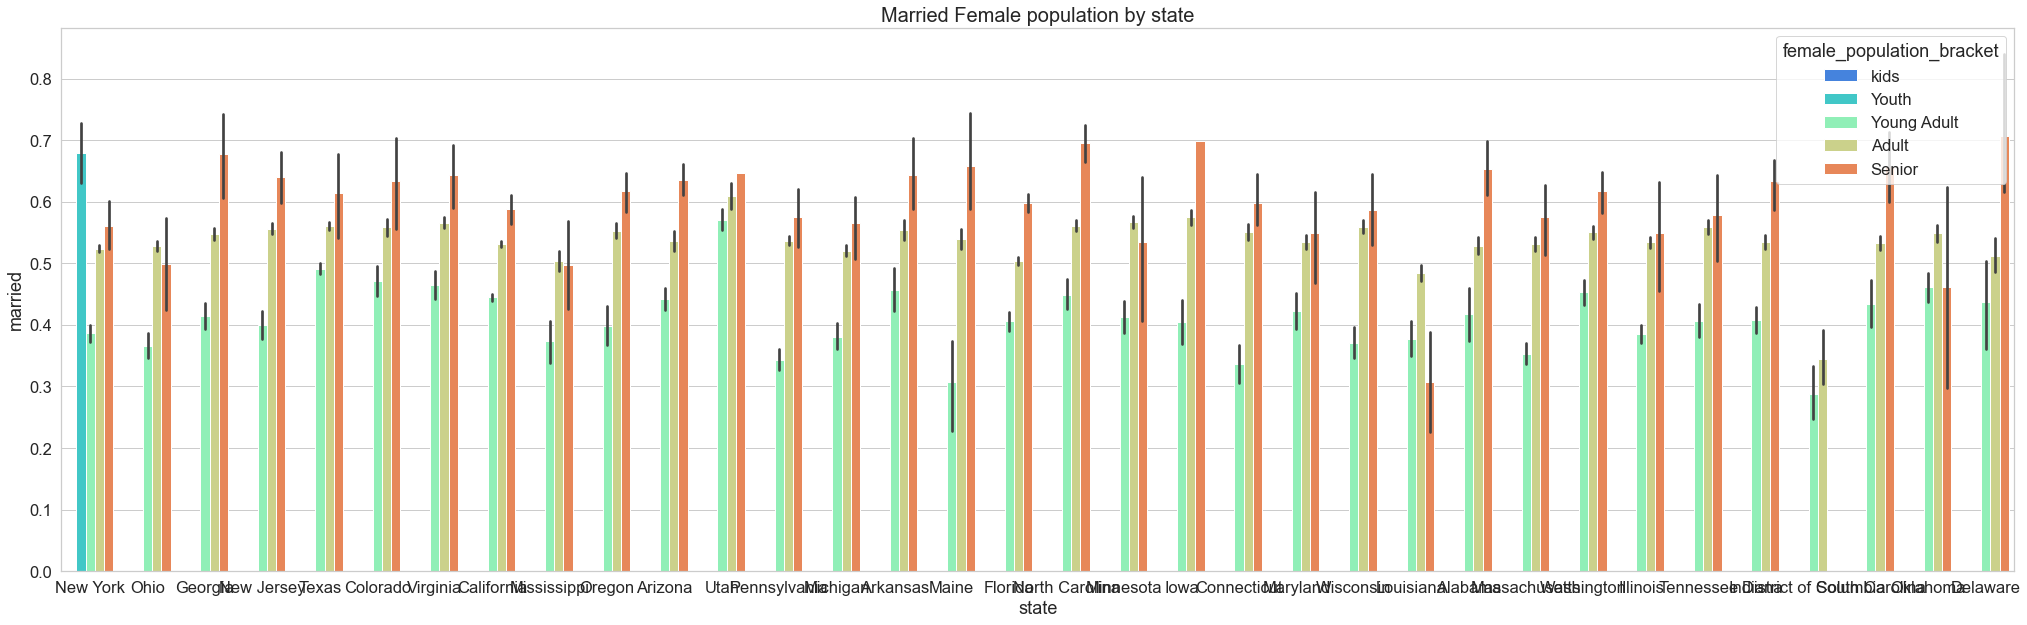

In [177]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 10))

ax = sns.barplot(x = 'state', y = 'married', hue = 'female_population_bracket', data = age_df, palette='rainbow', 
           order = ['New York', 'Ohio', 'Georgia', 'New Jersey', 'Texas', 'Colorado', 'Virginia', 'California', 'Mississippi', 'Oregon', 'Arizona', 'Utah', 'Pennsylvania', 'Michigan', 'Arkansas', 'Maine', 'Florida', 'North Carolina', 
                     'Minnesota', 'Iowa', 'Connecticut', 'Maryland', 'Wisconsin', 'Louisiana', 'Alabama', 'Massachusetts', 'Washington', 'Illinois', 'Tennessee', 'Indiana', 'District of Columbia', 'South Carolina', 'Oklahoma', 'Delaware'])

ax.set_title('Married Female population by state', fontsize = 20)

plt.show()

In [178]:
# New your has High Femaile arried Kids

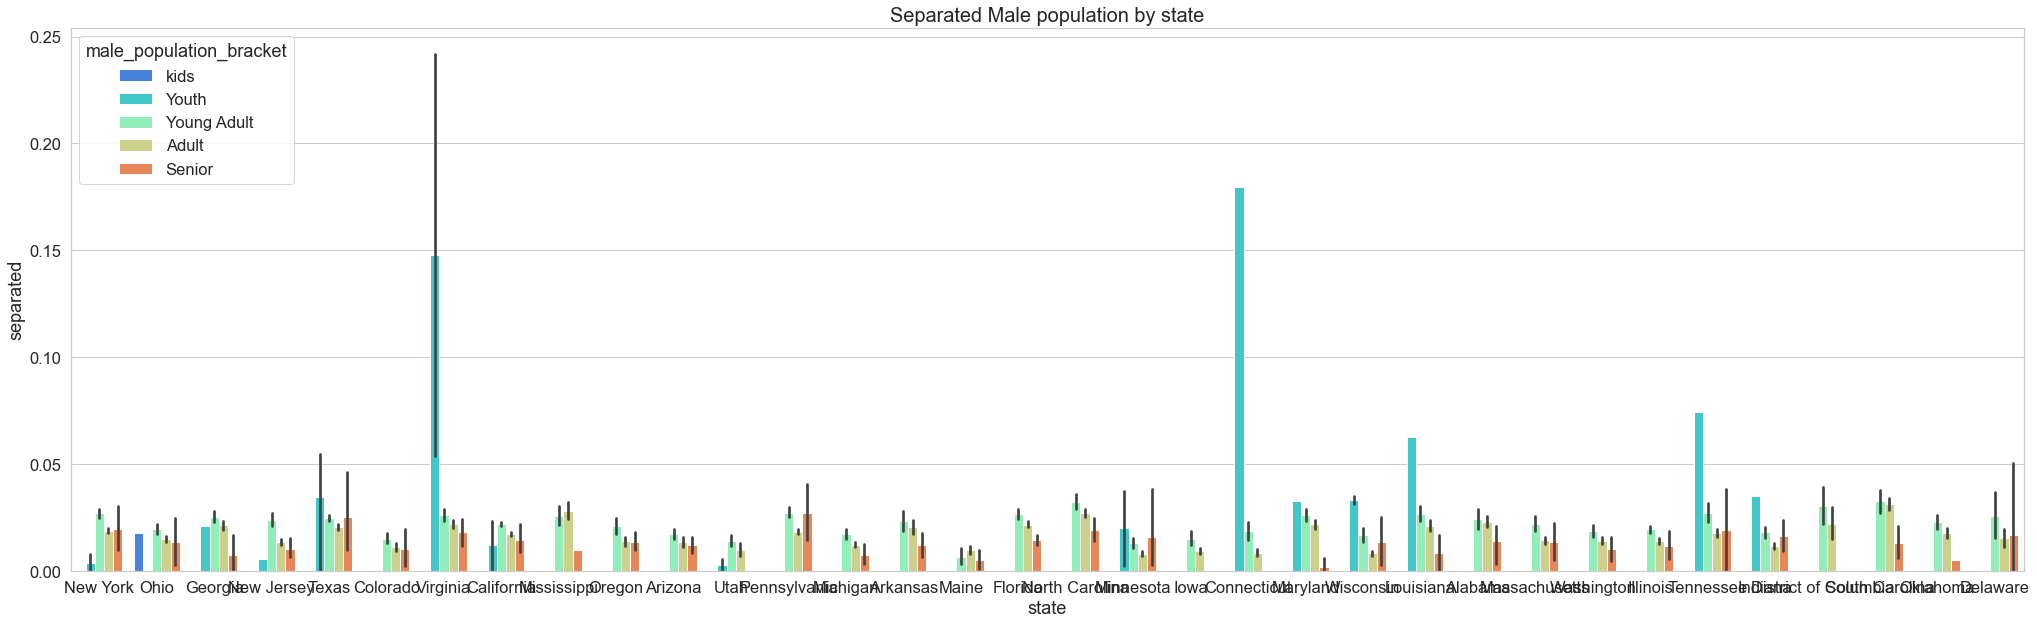

In [179]:
## Separated

sns.set_style("whitegrid")
plt.figure(figsize = (35, 10))

ax = sns.barplot(x = 'state', y = 'separated', hue = 'male_population_bracket', data = age_df, palette='rainbow', 
           order = ['New York', 'Ohio', 'Georgia', 'New Jersey', 'Texas', 'Colorado', 'Virginia', 'California', 'Mississippi', 'Oregon', 'Arizona', 'Utah', 'Pennsylvania', 'Michigan', 'Arkansas', 'Maine', 'Florida', 'North Carolina', 
                     'Minnesota', 'Iowa', 'Connecticut', 'Maryland', 'Wisconsin', 'Louisiana', 'Alabama', 'Massachusetts', 'Washington', 'Illinois', 'Tennessee', 'Indiana', 'District of Columbia', 'South Carolina', 'Oklahoma', 'Delaware'])

ax.set_title('Separated Male population by state', fontsize = 20)

plt.show()

In [180]:
# "Connecticut, followed by Virginia", has Highest Separated Male Youth population

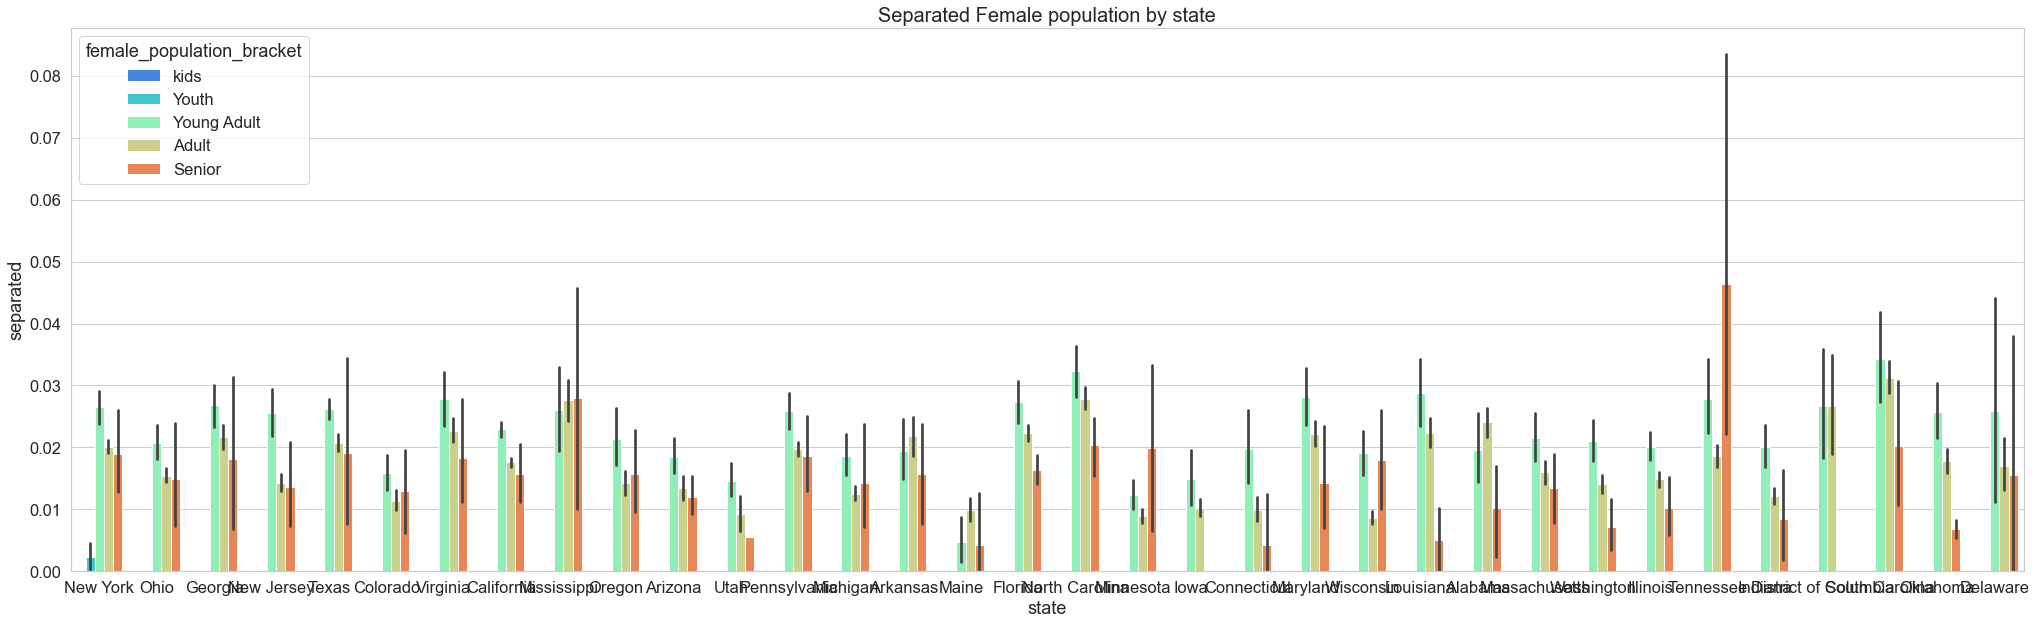

In [181]:
## Separated Female

sns.set_style("whitegrid")
plt.figure(figsize = (35, 10))

ax = sns.barplot(x = 'state', y = 'separated', hue = 'female_population_bracket', data = age_df, palette='rainbow', 
           order = ['New York', 'Ohio', 'Georgia', 'New Jersey', 'Texas', 'Colorado', 'Virginia', 'California', 'Mississippi', 'Oregon', 'Arizona', 'Utah', 'Pennsylvania', 'Michigan', 'Arkansas', 'Maine', 'Florida', 'North Carolina', 
                     'Minnesota', 'Iowa', 'Connecticut', 'Maryland', 'Wisconsin', 'Louisiana', 'Alabama', 'Massachusetts', 'Washington', 'Illinois', 'Tennessee', 'Indiana', 'District of Columbia', 'South Carolina', 'Oklahoma', 'Delaware'])

ax.set_title('Separated Female population by state', fontsize = 20)

plt.show()

### Except for "Newyork", No other state has Separated Female Youth population
### "Tennessee" has the Highest Separated Female SENIOR population

### Please detail your observations for rent as a percentage of income at an overall level, and for different states.

In [185]:
rent_df = train_df[['state', 'city', 'rent_median', 'hi_median', 'family_median']]
Overall_rent_percentage = (rent_df['rent_median'].sum() / rent_df['hi_median'].sum()) * 100
round(Overall_rent_percentage, 2)
Overall_rent_percentage

1.742361651083271

#### Overall Rent as a percentage of Overall House Hold Income is around 1.74%.

In [186]:
rent_df['ov_rent_pcnt'] = round((rent_df['rent_median'] / rent_df['hi_median']) * 100, 2)

C:\Users\ACER\AppData\Local\Temp\ipykernel_5480\88812507.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [187]:

print(list(rent_df.nlargest(500, 'ov_rent_pcnt').state.unique()))
print(len(list(rent_df.nlargest(500, 'ov_rent_pcnt').state.unique())))

['Georgia', 'Texas', 'California', 'New York', 'Florida', 'Washington', 'Oregon', 'Pennsylvania', 'Maryland', 'Virginia', 'Mississippi', 'Alabama', 'Michigan', 'Louisiana', 'Iowa', 'Puerto Rico', 'New Jersey', 'Illinois', 'Arizona', 'North Carolina', 'South Carolina', 'Tennessee', 'Ohio', 'Wisconsin', 'Missouri', 'Connecticut', 'Minnesota', 'Massachusetts', 'Indiana', 'Colorado', 'Kansas', 'Oklahoma', 'District of Columbia', 'New Mexico', 'Hawaii', 'Maine', 'Arkansas', 'Vermont', 'Rhode Island', 'Kentucky']
40


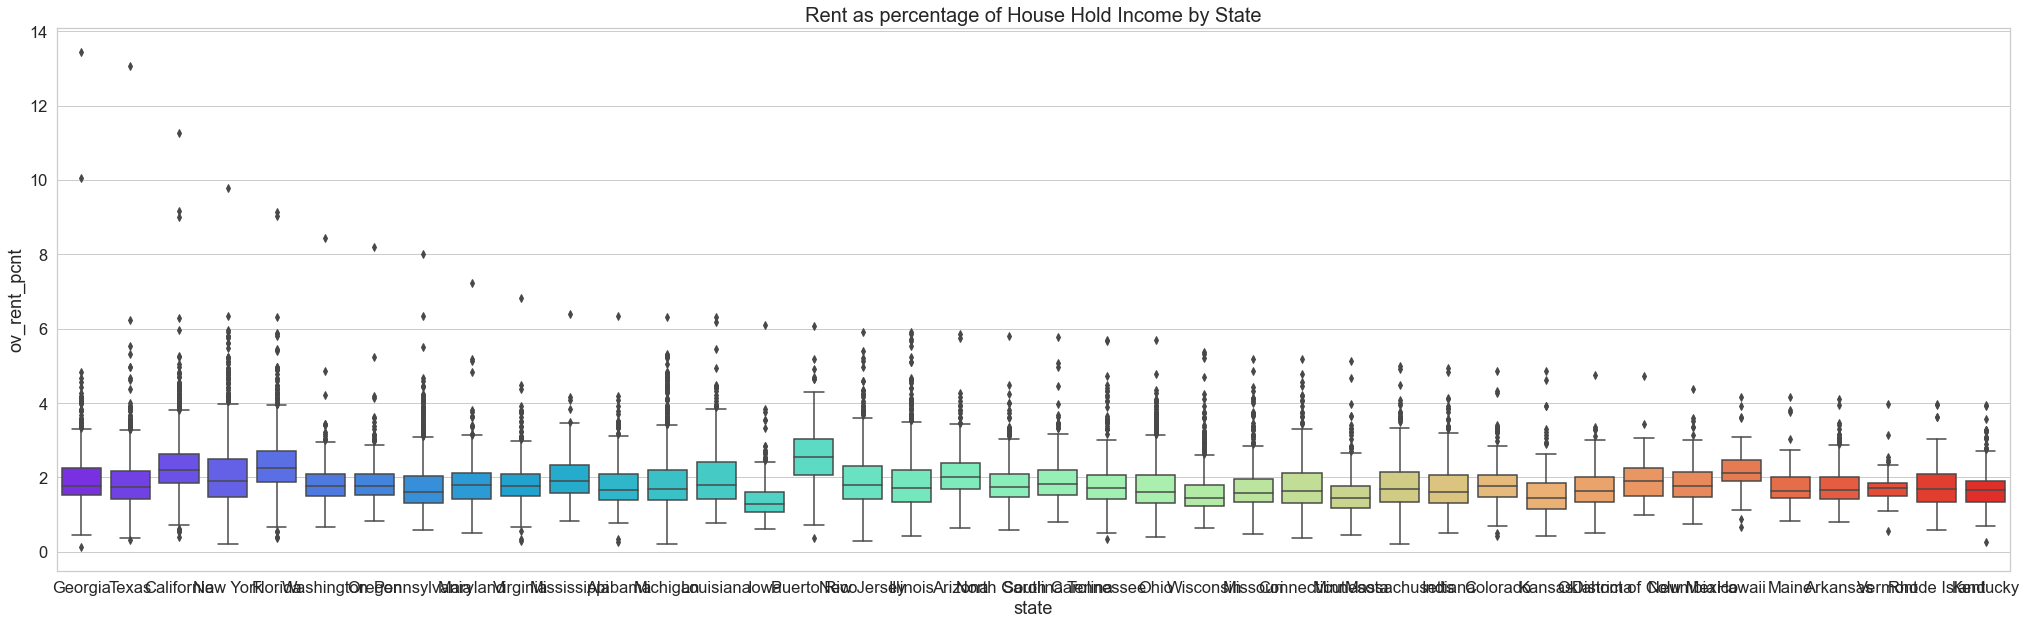

In [189]:
plt.figure(figsize = (35, 10))
ax = sns.boxplot(x = 'state', y = 'ov_rent_pcnt', data=rent_df.nlargest(26585, 'ov_rent_pcnt'), palette='rainbow', 
            order = ['Georgia', 'Texas', 'California', 'New York', 'Florida', 'Washington', 'Oregon', 'Pennsylvania', 'Maryland', 'Virginia', 'Mississippi', 'Alabama', 'Michigan', 'Louisiana', 
                     'Iowa', 'Puerto Rico', 'New Jersey', 'Illinois', 'Arizona', 'North Carolina', 'South Carolina', 'Tennessee', 'Ohio', 'Wisconsin', 'Missouri', 'Connecticut', 'Minnesota', 
                     'Massachusetts', 'Indiana', 'Colorado', 'Kansas', 'Oklahoma', 'District of Columbia', 'New Mexico', 'Hawaii', 'Maine', 'Arkansas', 'Vermont', 'Rhode Island', 'Kentucky']
           ).set_title('Rent as percentage of House Hold Income by State', fontsize = 20)
#ax.set(ylim=(0, 100))
plt.show()


### Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

In [192]:
cor=train_df[['COUNTYID','STATEID','zip_code','type','pop', 'family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree',
           'pct_own', 'married','separated', 'divorced']].corr()

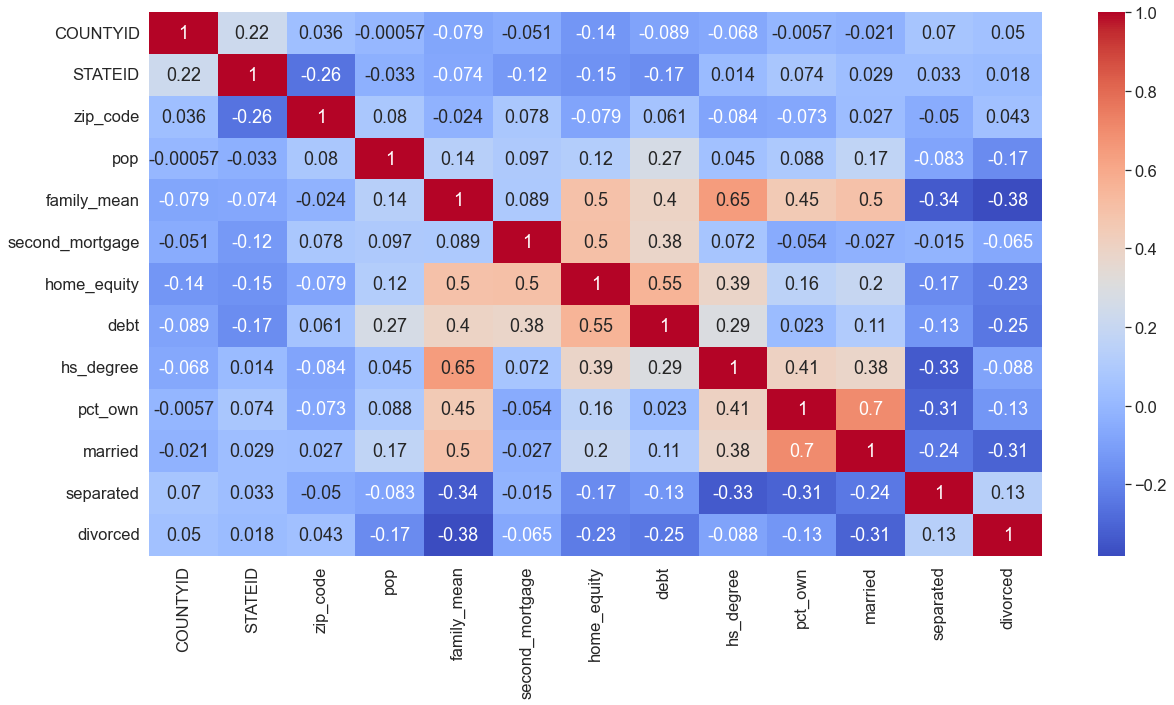

In [193]:
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

In [194]:

pip install Factor_Analyzer

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


  Created wheel for Factor-Analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42070 sha256=889f7b23b87c5f1edb72ce91265e9974ba2707dabf9a15eb084020242cff15bd
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\6d\32\bd\460a71becd83f7d77152f437c2fd451f5c87bc19cfcdbfcd24
Successfully built Factor-Analyzer


In [195]:
train_df['Bad_Debt'] = train_df['second_mortgage'] + train_df['home_equity'] - train_df['home_equity_second_mortgage']

In [196]:
#categoriak variable:

def cat_variables(df):
    cat_variables = list(df.select_dtypes(exclude = ['int', 'float']).columns)
    return cat_variables

In [197]:
#numerical Var:

def num_variables(df):
    num_variables = list(df.select_dtypes(include = ['int', 'float']).columns)
    return num_variables


In [198]:
cat_variables(train_df)

['state', 'state_ab', 'city', 'place', 'type', 'bins_bad_debt', 'bins']

In [199]:
num_variables(train_df)

['SUMLEVEL',
 'COUNTYID',
 'STATEID',
 'zip_code',
 'area_code',
 'lat',
 'lng',
 'ALand',
 'AWater',
 'pop',
 'male_pop',
 'female_pop',
 'rent_mean',
 'rent_median',
 'rent_stdev',
 'rent_sample_weight',
 'rent_samples',
 'rent_gt_10',
 'rent_gt_15',
 'rent_gt_20',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'universe_samples',
 'used_samples',
 'hi_mean',
 'hi_median',
 'hi_stdev',
 'hi_sample_weight',
 'hi_samples',
 'family_mean',
 'family_median',
 'family_stdev',
 'family_sample_weight',
 'family_samples',
 'hc_mortgage_mean',
 'hc_mortgage_median',
 'hc_mortgage_stdev',
 'hc_mortgage_sample_weight',
 'hc_mortgage_samples',
 'hc_mean',
 'hc_median',
 'hc_stdev',
 'hc_samples',
 'hc_sample_weight',
 'home_equity_second_mortgage',
 'second_mortgage',
 'home_equity',
 'debt',
 'second_mortgage_cdf',
 'home_equity_cdf',
 'debt_cdf',
 'hs_degree',
 'hs_degree_male',
 'hs_degree_female',
 'male_age_mean',
 'male_age_median',
 'male_age_stdev',
 'male_ag

In [200]:
fa_train_df = train_df[num_variables(train_df)]
fa_train_df

SUMLEVEL  COUNTYID  STATEID  zip_code  area_code        lat  \
UID                                                                   
267822       140        53       36     13346        315  42.840812   
246444       140       141       18     46616        574  41.701441   
245683       140        63       18     46122        317  39.792202   
279653       140       127       72       927        787  18.396103   
247218       140       161       20     66502        785  39.195573   
...          ...       ...      ...       ...        ...        ...   
279212       140        43       72       769        787  18.076060   
277856       140        91       42     19422        215  40.158138   
233000       140        87        8     80653        970  40.410316   
287425       140       439       48     76034        817  32.904866   
265371       140         3       32     89123        702  36.064754   

               lng         ALand    AWater    pop  ...  female_age_stdev  \
UID                                                ...                     
267822  -75.501524  2.021834e+08   1699120   5230  ...          22.51276   
246444  -86.266614  1.560828e+06    100363   2633  ...          23.43353   
245683  -86.515246  6.956160e+07    284193   6881  ...          23.94119   
279653  -66.104169  1.105793e+06         0   2700  ...          24.32015   
247218  -96.569366  2.554403e+06         0   5637  ...          11.10484   
...            ...           ...       ...    ...  ...               ...   
279212  -66.358379  6.970300e+05         0   1847  ...          24.79821   
277856  -75.307271  5.077337e+06     11786   4155  ...          21.84826   
233000 -103.814003  1.323262e+09  17577610   2829  ...          23.40858   
287425  -97.162151  1.865230e+07    158882  11542  ...          21.36235   
265371 -115.152237  7.796308e+06         0   3726  ...          19.77208   

        female_age_sample_weight  female_age_samples  pct_own  married  \
UID                                                                      
267822                 685.33845              2618.0  0.79046  0.57851   
246444                 267.23367              1284.0  0.52483  0.34886   
245683                 707.01963              3238.0  0.85331  0.64745   
279653                 362.20193              1559.0  0.65037  0.47257   
247218                1854.48652              3051.0  0.13046  0.12356   
...                          ...                 ...      ...      ...   
279212                 230.87898               938.0  0.60422  0.24603   
277856                 496.20427              2039.0  0.68072  0.61127   
233000                 316.52078              1364.0  0.78508  0.70451   
287425                1373.94120              5815.0  0.93970  0.75503   
265371                 526.73261              1911.0  0.27912  0.34426   

        married_snp  separated  divorced  bad_debt  Bad_Debt  
UID                                                           
267822      0.01882    0.01240   0.08770   0.09408   0.09408  
246444      0.01426    0.01426   0.09030   0.04274   0.04274  
245683      0.02830    0.01607   0.10657   0.09512   0.09512  
279653      0.02021    0.02021   0.10106   0.01086   0.01086  
247218      0.00000    0.00000   0.03109   0.05426   0.05426  
...             ...        ...       ...       ...       ...  
279212      0.03042    0.02249   0.14683   0.00000   0.00000  
277856      0.05003    0.02473   0.04888   0.20908   0.20908  
233000      0.01386    0.00520   0.07712   0.07857   0.07857  
287425      0.02287    0.00915   0.05261   0.14305   0.14305  
265371      0.03825    0.03005   0.13320   0.18362   0.18362  

[26585 rows x 74 columns]

In [201]:
# exclude columns you don't want
fa_train_df = fa_train_df[fa_train_df.columns[~fa_train_df.columns.isin(['SUMLEVEL', 'lat', 'lng', 
                                                                                                            'ALand', # 'AWater'
                                                                                                        ])]]

In [202]:
from factor_analyzer import FactorAnalyzer
import warnings
warnings.filterwarnings('ignore')

In [203]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer( rotation=None, n_factors = 25)
fa.fit(fa_train_df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([ 1.62038417e+01,  1.22232730e+01,  8.39184167e+00,  4.60729520e+00,
        4.20084853e+00,  3.11177444e+00,  2.09231784e+00,  1.54791938e+00,
        1.39631288e+00,  1.26983535e+00,  1.18660187e+00,  1.13249610e+00,
        1.01911585e+00,  9.68858720e-01,  9.27525211e-01,  8.50818684e-01,
        7.56439613e-01,  7.43946811e-01,  6.30181424e-01,  5.79108474e-01,
        5.49405923e-01,  4.86295148e-01,  4.48527864e-01,  4.14596981e-01,
        3.75941281e-01,  3.45270900e-01,  3.12615301e-01,  3.04472390e-01,
        2.55000228e-01,  2.42806739e-01,  2.35213180e-01,  2.05804220e-01,
        2.00864928e-01,  1.83744145e-01,  1.70517142e-01,  1.52643453e-01,
        1.41660290e-01,  1.32762103e-01,  1.16584486e-01,  1.08497546e-01,
        1.05211674e-01,  9.66185682e-02,  9.15577253e-02,  9.04775511e-02,
        5.82860922e-02,  5.03791575e-02,  4.11783422e-02,  3.44901459e-02,
        3.23607686e-02,  2.71841619e-02,  2.23483431e-02,  2.12141106e-02,
        1.90322571e-02,  

In [204]:
print(sorted(ev, reverse=True))

[16.20384167486745, 12.223273013243555, 8.391841672772518, 4.607295202427698, 4.2008485324027856, 3.111774435903476, 2.0923178422985766, 1.5479193821091426, 1.3963128773490232, 1.2698353513550196, 1.1866018704195656, 1.1324961003803413, 1.0191158540522072, 0.9688587197804344, 0.9275252114898286, 0.8508186836046356, 0.7564396126768098, 0.7439468111149999, 0.6301814244198786, 0.579108473686187, 0.5494059233851478, 0.48629514820046377, 0.4485278636006596, 0.4145969806006866, 0.3759412814061914, 0.34527090035417213, 0.3126153012161775, 0.3044723897157397, 0.2550002281765816, 0.2428067389070976, 0.23521318043399472, 0.2058042202016133, 0.20086492762391772, 0.18374414461223032, 0.17051714160167056, 0.15264345340126098, 0.1416602896907358, 0.132762102618008, 0.11658448576048196, 0.10849754648631138, 0.1052116737011577, 0.09661856818142668, 0.09155772533806981, 0.09047755107802745, 0.05828609224877252, 0.050379157518513074, 0.04117834220847699, 0.03449014592885304, 0.03236076861674925, 0.02718

In [206]:
loadings = fa.loadings_
Factors  = pd.DataFrame.from_records(loadings)

Factors = Factors.add_prefix('Factor ')

Factors.index = fa_train_df.columns
Factors

Factor 0  Factor 1  Factor 2  Factor 3  Factor 4  \
COUNTYID                    -0.119817  0.031600  0.062926 -0.049422  0.041305   
STATEID                     -0.119858 -0.007289  0.179574 -0.076191  0.071668   
zip_code                    -0.033849  0.092722 -0.059252 -0.104644 -0.012526   
area_code                    0.019001  0.016793 -0.014615  0.028099  0.007108   
AWater                      -0.009280 -0.020495  0.024504 -0.018689  0.023065   
pop                          0.307748  0.930304  0.086257  0.046773  0.032288   
male_pop                     0.300751  0.909472  0.084000  0.027785  0.034202   
female_pop                   0.305652  0.923577  0.085937  0.063905  0.029460   
rent_mean                    0.754251 -0.072234 -0.311745  0.176135  0.134290   
rent_median                  0.712806 -0.066284 -0.304986  0.160024  0.116986   
rent_stdev                   0.567555 -0.062125 -0.231332  0.183432  0.210117   
rent_sample_weight          -0.403123  0.493604 -0.249383 -0.168817  0.238583   
rent_samples                -0.113521  0.576628 -0.458044 -0.146516  0.384307   
rent_gt_10                  -0.052524  0.117497 -0.276547  0.271873 -0.175925   
rent_gt_15                  -0.107051  0.137565 -0.424960  0.482683 -0.211428   
rent_gt_20                  -0.203189  0.118071 -0.464662  0.585938 -0.184942   
rent_gt_25                  -0.266106  0.106589 -0.482649  0.672948 -0.174899   
rent_gt_30                  -0.290918  0.094030 -0.464468  0.693561 -0.161428   
rent_gt_35                  -0.288361  0.077981 -0.450990  0.701870 -0.139797   
rent_gt_40                  -0.285981  0.067103 -0.439780  0.690599 -0.128433   
rent_gt_50                  -0.263598  0.042798 -0.400852  0.596662 -0.091033   
universe_samples            -0.133280  0.594722 -0.429174 -0.137102  0.389729   
used_samples                -0.105505  0.578156 -0.453912 -0.148234  0.382101   
hi_mean                      0.940850 -0.144416  0.024776  0.007335  0.118101   
hi_median                    0.913055 -0.130196  0.036477 -0.024141  0.071647   
hi_stdev                     0.873970 -0.162733 -0.009756  0.098112  0.235399   
hi_sample_weight            -0.194866  0.873593  0.148804  0.070445  0.065844   
hi_samples                   0.315238  0.882400  0.180798  0.054831  0.099717   
family_mean                  0.931801 -0.170710  0.033726  0.022078  0.169151   
family_median                0.907753 -0.168689  0.036750  0.012417  0.154961   
family_stdev                 0.806141 -0.146031 -0.027994  0.089149  0.244987   
family_sample_weight        -0.155549  0.878648  0.224055  0.095309 -0.075557   
family_samples               0.389411  0.837298  0.277096  0.089449 -0.051399   
hc_mortgage_mean             0.799575 -0.133218 -0.346602  0.149255  0.296150   
hc_mortgage_median           0.780004 -0.131020 -0.355373  0.141762  0.291036   
hc_mortgage_stdev            0.690155 -0.140234 -0.144232  0.172219  0.244031   
hc_mortgage_sample_weight    0.110751  0.647323  0.507887  0.002959 -0.322863   
hc_mortgage_samples          0.588925  0.610893  0.303830  0.058124 -0.231357   
hc_mean                      0.706402 -0.166286 -0.254031  0.153655  0.361563   
hc_median                    0.676538 -0.156715 -0.256066  0.142694  0.349043   
hc_stdev                     0.537323 -0.130968 -0.106460  0.185986  0.359590   
hc_samples                   0.082743  0.409225  0.743008  0.299523  0.022661   
hc_sample_weight            -0.126619  0.407644  0.752010  0.239745 -0.044426   
home_equity_second_mortgage  0.222983  0.104197 -0.334597 -0.211556 -0.577198   
second_mortgage              0.247541  0.096951 -0.361328 -0.203409 -0.594723   
home_equity                  0.658084 -0.021611 -0.313492 -0.103351 -0.472374   
debt                         0.537004  0.182086 -0.453610 -0.229479 -0.300395   
second_mortgage_cdf         -0.350519 -0.101707  0.165859  0.143543  0.577989   
home_equity_cdf             -0.677817  0.011793  0.270871  0

In [207]:
fa = FactorAnalyzer( rotation="varimax", n_factors = 12)
fa.fit(fa_train_df)
loadings = fa.loadings_


In [208]:
 Factors  = pd.DataFrame.from_records(loadings)

Factors = Factors.add_prefix('Factor ')

Factors.index = fa_train_df.columns
Factors

Factor 0  Factor 1  Factor 2  Factor 3  Factor 4  \
COUNTYID                    -0.097272  0.016442 -0.020601 -0.029253 -0.066705   
STATEID                     -0.127263  0.003407 -0.045035 -0.092598 -0.056251   
zip_code                    -0.024247  0.050549  0.029152 -0.038014 -0.105817   
area_code                    0.041655  0.030202 -0.050498 -0.000926 -0.021953   
AWater                      -0.000928 -0.016136 -0.011201 -0.020040 -0.002084   
pop                          0.119621  0.973216  0.106020 -0.010522 -0.104761   
male_pop                     0.116765  0.951718  0.085145 -0.023973 -0.107140   
female_pop                   0.118222  0.961214  0.124264  0.002854 -0.099038   
rent_mean                    0.802304  0.064644 -0.107145  0.040510 -0.014221   
rent_median                  0.756579  0.063139 -0.116440  0.033377 -0.027308   
rent_stdev                   0.664042  0.028524  0.058815  0.086918  0.051326   
rent_sample_weight          -0.322743  0.209498  0.784564  0.043434 -0.123675   
rent_samples                 0.015753  0.296563  0.922824  0.051334 -0.138533   
rent_gt_10                  -0.031413  0.047528  0.034035  0.211641 -0.041507   
rent_gt_15                  -0.014143  0.031928  0.066853  0.381198 -0.047637   
rent_gt_20                  -0.041289 -0.002096  0.091172  0.591220 -0.036641   
rent_gt_25                  -0.062393 -0.016440  0.088488  0.750238 -0.035810   
rent_gt_30                  -0.072363 -0.018744  0.063192  0.868231 -0.037958   
rent_gt_35                  -0.061206 -0.023299  0.045562  0.939035 -0.043858   
rent_gt_40                  -0.059570 -0.029564  0.041500  0.941929 -0.050273   
rent_gt_50                  -0.047787 -0.048807  0.051273  0.832391 -0.057977   
universe_samples            -0.004400  0.317465  0.917707  0.051377 -0.128016   
used_samples                 0.019880  0.300670  0.919927  0.045256 -0.134671   
hi_mean                      0.844209  0.107910 -0.270566 -0.197736  0.033655   
hi_median                    0.791957  0.121188 -0.313133 -0.218120  0.005769   
hi_stdev                     0.851850  0.054588 -0.108873 -0.097027  0.106234   
hi_sample_weight            -0.332873  0.759977  0.474754  0.059674  0.118481   
hi_samples                   0.088803  0.909507  0.304347 -0.053615  0.113561   
family_mean                  0.840321  0.068265 -0.182496 -0.180106  0.088035   
family_median                0.814153  0.068617 -0.204508 -0.182681  0.067142   
family_stdev                 0.776531  0.036791 -0.023708 -0.080191  0.123696   
family_sample_weight        -0.314052  0.846473  0.127563  0.040245  0.002878   
family_samples               0.124030  0.957985 -0.045373 -0.071770  0.029750   
hc_mortgage_mean             0.936760 -0.006468  0.051376  0.004670  0.010709   
hc_mortgage_median           0.920921 -0.010428  0.048558  0.008784 -0.009042   
hc_mortgage_stdev            0.765854  0.003544  0.028144 -0.016978  0.154243   
hc_mortgage_sample_weight   -0.306262  0.767217 -0.233840 -0.100514  0.130522   
hc_mortgage_samples          0.205001  0.808735 -0.269559 -0.100834  0.079240   
hc_mean                      0.861958 -0.038264  0.057313 -0.005546  0.023244   
hc_median                    0.824192 -0.037226  0.057277 -0.004050  0.008690   
hc_stdev                     0.685561 -0.013069  0.065372  0.002519  0.116181   
hc_samples                  -0.107290  0.614317 -0.241597 -0.066207  0.416176   
hc_sample_weight            -0.316917  0.559439 -0.233829 -0.060638  0.371555   
home_equity_second_mortgage  0.030624  0.039945  0.038815  0.007512 -0.091683   
second_mortgage              0.061176  0.033599  0.037637  0.019780 -0.087903   
home_equity                  0.359940  0.042709 -0.033387 -0.031260 -0.019220   
debt                         0.312827  0.172834  0.005863 -0.033463 -0.252737   
second_mortgage_cdf         -0.085406 -0.118677  0.085464  0.021332  0.011606   
home_equity_cdf             -0.361392 -0.065573  0.049800  0

In [210]:
Factors_df = round(Factors.loc[['hs_degree', 'hs_degree_male', 'hs_degree_female',"male_age_median", "female_age_median", "home_equity_second_mortgage", 'second_mortgage']])

In [215]:
def color_negative_red(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if value < -0.6:
    color = 'green'
  elif value > 0.6:
    color = 'yellow'
  else:
    color = 'black'

  return 'color: %s' % color

In [216]:
Factors_df.style.applymap(color_negative_red)

### Data Modeling :

#### Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. 

       

In [427]:
train_df=pd.read_csv("F:\\DS\\Data-Science-Capstone-Projects-master\\Project_1\\Project 1\\train_RE.csv")
test_df=pd.read_csv("F:\\DS\\Data-Science-Capstone-Projects-master\\Project_1\\Project 1\\test_RE.csv")

In [428]:
print('train:', train_df.shape)
print('test:', test_df.shape)

train: (27321, 80)
test: (11709, 80)


In [429]:
# drop blockid has it has no data 
train_df.drop(['BLOCKID'],axis=1, inplace=True)
test_df.drop(['BLOCKID'],axis=1, inplace=True)


In [430]:
train_df.drop(['primary'],axis=1, inplace=True)
test_df.drop(['primary'],axis=1, inplace=True)

In [431]:
nulldata_train=train_df[train_df.isnull().any(axis=1)]
nulldata_train
nulldata_test=test_df[test_df.isnull().any(axis=1)]
nulldata_test

UID  SUMLEVEL  COUNTYID  STATEID                 state state_ab  \
17     265339       140         3       32                Nevada       NV   
27     287596       140       451       48                 Texas       TX   
44     250903       140        25       25         Massachusetts       MA   
54     287557       140       441       48                 Texas       TX   
70     247510       140       209       20                Kansas       KS   
120    281635       140        37       47             Tennessee       TN   
128    240877       140         3       15                Hawaii       HI   
153    253631       140        65       26              Michigan       MI   
169    224984       140        29        6            California       CA   
172    236762       140        86       12               Florida       FL   
195    246583       140       157       18               Indiana       IN   
240    266161       140         5       36              New York       NY   
292    266664       140        27       36              New York       NY   
387    267827       140        55       36              New York       NY   
420    266291       140         5       36              New York       NY   
423    290305       140       710       51              Virginia       VA   
460    265339       140         3       32                Nevada       NV   
463    240928       140         3       15                Hawaii       HI   
473    224994       140        29        6            California       CA   
489    267354       140        47       36              New York       NY   
533    269319       140        81       36              New York       NY   
606    268339       140        61       36              New York       NY   
660    249283       140        71       22             Louisiana       LA   
670    260922       140       119       37        North Carolina       NC   
682    222403       140         3        4               Arizona       AZ   
698    287528       140       439       48                 Texas       TX   
703    284049       140       113       48                 Texas       TX   
708    282492       140       157       47             Tennessee       TN   
840    258688       140        35       28           Mississippi       MS   
897    250903       140        25       25         Massachusetts       MA   
917    261752       140        17       38          North Dakota       ND   
934    247937       140        93       21              Kentucky       KY   
966    236189       140        71       12               Florida       FL   
974    250826       140        23       25         Massachusetts       MA   
979    270827       140       119       36              New York       NY   
1009   279895       140         5       44          Rhode Island       RI   
1036   225668       140        37        6            California       CA   
1127   280975       140        79       45        South Carolina       SC   
1134   224969       140        29        6            California       CA   
1170   267675       140        47       36              New York       NY   
1194   265797       140        23       32                Nevada       NV   
1208   274394       140       109       40              Oklahoma       OK   
1218   260516       140        89       37        North Carolina       NC   
1254   224590       140        19        6            California       CA   
1270   278467       140       101       42          Pennsylvania       PA   
1297   225630       140        37        6            California       CA   
1333   251389       140         3       24              Maryland       MD   
1335   283044       140        27       48                 Texas       TX   
1340   224994       140        29        6            California       CA   
1357   293759       140        11       54         West Virginia       WV   
1400   251389       140         3       24              Maryland       MD   
1417  

In [432]:
print(len(test_df.columns[test_df.isnull().sum() >0]))
print(len(train_df.columns[train_df.isnull().sum() >0]))

58
58


In [433]:
train_df=pd.concat([train_df,nulldata_train, nulldata_train]).drop_duplicates(keep=False)
test_df=pd.concat([test_df,nulldata_test, nulldata_test]).drop_duplicates(keep=False)

In [434]:
print(len(test_df.columns[test_df.isnull().sum() >0]))
print(len(train_df.columns[train_df.isnull().sum() >0]))

0
0


In [435]:
print('train:', train_df.shape)
print('test:', test_df.shape)

train: (26585, 78)
test: (11355, 78)


In [436]:
train_df.drop('SUMLEVEL', inplace = True, axis = 1)
test_df.drop('SUMLEVEL', inplace = True, axis = 1)

In [437]:
cat_columns = ['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type', 'zip_code', 'area_code']

In [378]:
print(train_df[cat_columns])
print('--------------------')
print(train_df[num_variables(train_df)])

          UID  COUNTYID  STATEID         state state_ab         city  \
0      267822        53       36      New York       NY     Hamilton   
1      246444       141       18       Indiana       IN   South Bend   
2      245683        63       18       Indiana       IN     Danville   
3      279653       127       72   Puerto Rico       PR     San Juan   
4      247218       161       20        Kansas       KS    Manhattan   
...       ...       ...      ...           ...      ...          ...   
27316  279212        43       72   Puerto Rico       PR        Coamo   
27317  277856        91       42  Pennsylvania       PA    Blue Bell   
27318  233000        87        8      Colorado       CO      Weldona   
27319  287425       439       48         Texas       TX  Colleyville   
27320  265371         3       32        Nevada       NV    Las Vegas   

                  place     type  zip_code  area_code  
0              Hamilton     City     13346        315  
1              Roseland

In [438]:
##change from numerical to cat
num_2_cat = ['UID','COUNTYID', 'STATEID', 'zip_code', 'area_code', 'lat', 'lng']

In [439]:
for col in num_2_cat:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')

In [256]:
print(train_df.info())
print('-----------')
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26585 entries, 0 to 27320
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   UID                          26585 non-null  category
 1   COUNTYID                     26585 non-null  category
 2   STATEID                      26585 non-null  category
 3   state                        26585 non-null  category
 4   state_ab                     26585 non-null  category
 5   city                         26585 non-null  category
 6   place                        26585 non-null  category
 7   type                         26585 non-null  category
 8   zip_code                     26585 non-null  category
 9   area_code                    26585 non-null  category
 10  lat                          26585 non-null  category
 11  lng                          26585 non-null  category
 12  ALand                        26585 non-null  float64 
 13  A

In [440]:
obj_2_cat = ['state', 'state_ab', 'city', 'place', 'type']

In [441]:
for col in obj_2_cat:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')

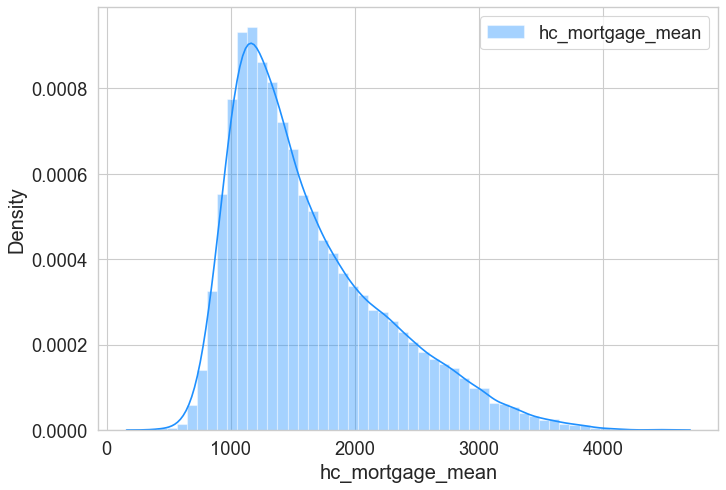

In [257]:
# Y Variable
# Plot
#kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(train_df.hc_mortgage_mean, color="dodgerblue", label="hc_mortgage_mean")

plt.legend();

### It is positively skewed

#### Model

In [442]:
from sklearn.linear_model import LinearRegression

In [443]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, SCORERS
lr = LinearRegression()


In [444]:
#Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)
#Where n is the sample size and p is the number of independent variables.

In [445]:
def adj_rsqrd(df, r2):
        # adjusted r2 using formula adj_r2 = 1 - (1- r2) * (n-1) / (n - k - 1)
    # k = number of predictors = data.shape[1] - 1
    adj_rsqrd = 1 - (1-r2)*(len(df) - 1) / (len(df) - (df.shape[1] - 1) - 1)
    return round(adj_rsqrd, 3)

In [446]:
cat_cols_2_drop = ['UID', 'state', 'state_ab', 'city', 'place', 'type', 'zip_code', 'area_code', 'lat', 'lng']

In [447]:
train_df.drop(cat_cols_2_drop, axis=1, inplace=True)
test_df.drop(cat_cols_2_drop, axis=1, inplace=True)

In [448]:
train_df.drop(['COUNTYID', 'STATEID'], axis=1, inplace=True)


In [449]:
test_y = test_df['hc_mortgage_mean']


In [450]:
test_df.drop(['COUNTYID', 'STATEID','hc_mortgage_mean'], axis=1, inplace=True)

In [451]:
print(train_df.shape, test_df.shape)

(26585, 65) (11355, 64)


In [452]:
train_X = train_df.drop(columns=['hc_mortgage_mean'])
train_y = train_df['hc_mortgage_mean']

In [453]:
#model fitting:
lr.fit(train_X, train_y)

LinearRegression()

In [454]:
#Predict:

predict_train = lr.predict(train_X)
predict_test = lr.predict(test_df)

In [455]:
# model evaluation for testing set

mae = mean_absolute_error(test_y, predict_test)
mse = mean_squared_error(test_y, predict_test)
r2 = r2_score(test_y, predict_test)

print("The model performance for test set")
print("--------------------------------------")
print('MAE is {}'.format(round(mae, 3)))
print('MSE is {}'.format(round(mse, 3)))
print('RMSE is {}'.format(round(mse**(0.5), 3)))
print('R2 score is {}'.format(round(r2, 3)))

print('Adjusted R2 score is {}'.format(adj_rsqrd(test_df, r2)))

The model performance for test set
--------------------------------------
MAE is 43.675
MSE is 4673.486
RMSE is 68.363
R2 score is 0.988
Adjusted R2 score is 0.988


### Multi colinerity

In [456]:
correlated_features = set()
correlation_matrix = train_df.drop('hc_mortgage_mean', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [457]:
correlated_features

{'debt_cdf',
 'family_mean',
 'family_median',
 'family_sample_weight',
 'family_samples',
 'family_stdev',
 'female_age_mean',
 'female_age_median',
 'female_age_sample_weight',
 'female_age_samples',
 'female_pop',
 'hc_median',
 'hc_mortgage_samples',
 'hc_sample_weight',
 'hi_median',
 'hi_samples',
 'hi_stdev',
 'home_equity_cdf',
 'hs_degree_female',
 'hs_degree_male',
 'male_age_median',
 'male_age_sample_weight',
 'male_age_samples',
 'male_pop',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'rent_median',
 'rent_samples',
 'second_mortgage',
 'universe_samples',
 'used_samples'}

In [458]:
corr_list = ['debt_cdf', 'family_mean', 'family_median', 'family_sample_weight', 'family_samples', 'family_stdev', 'female_age_mean', 'female_age_median',
                     'female_age_sample_weight', 'female_age_samples', 'female_pop', 'hc_median', 'hc_mortgage_samples', 'hc_sample_weight', 'hi_median',
                     'hi_samples', 'hi_stdev', 'home_equity_cdf', 'hs_degree_female', 'hs_degree_male', 'male_age_median', 'male_age_sample_weight',
                 'male_age_samples', 'male_pop', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'rent_median', 'rent_samples', 'second_mortgage', 'universe_samples', 'used_samples']


     


In [460]:
#drop multi col variables
train_df.drop(corr_list, axis=1, inplace=True)

test_df.drop(corr_list, axis=1, inplace=True)

In [461]:

print(train_df.shape, test_df.shape)

(26585, 31) (11355, 30)


### Dropped MultiCollinear variables and ran the Regression Model.

In [463]:
train_X = train_df.drop(columns=['hc_mortgage_mean'])
train_y = train_df['hc_mortgage_mean']

In [464]:
lr.fit(train_X, train_y)

LinearRegression()

In [465]:
predict_train = lr.predict(train_X)
predict_test = lr.predict(test_df)

In [466]:
ae = mean_absolute_error(test_y, predict_test)
mse = mean_squared_error(test_y, predict_test)
r2 = r2_score(test_y, predict_test)

print("The model performance for test set")
print("--------------------------------------")
print('MAE is {}'.format(round(mae, 3)))
print('MSE is {}'.format(round(mse, 3)))
print('RMSE is {}'.format(round(mse**(0.5), 3)))
print('R2 score is {}'.format(round(r2, 3)))

print('Adjusted R2 score is {}'.format(adj_rsqrd(test_df, r2)))


The model performance for test set
--------------------------------------
MAE is 43.675
MSE is 4787.228
RMSE is 69.19
R2 score is 0.988
Adjusted R2 score is 0.988


### Predict vals checking

In [467]:
import random
randomlist = []
for i in range(0,100):
    n = random.randint(1,len(test_df))
    randomlist.append(n)
print(randomlist)

[2889, 3179, 8193, 2032, 1621, 2288, 10618, 9810, 4451, 11032, 1223, 1731, 7998, 3759, 5040, 9765, 9849, 9626, 918, 7521, 1943, 1536, 5148, 5325, 7130, 5804, 11307, 6, 6709, 6304, 9346, 6946, 7889, 10777, 3931, 6946, 2125, 177, 2342, 1022, 6996, 2898, 3398, 34, 2590, 11069, 5451, 3881, 1246, 2787, 10738, 8168, 6291, 1129, 2127, 32, 6748, 1807, 3375, 5079, 6149, 3260, 3809, 3, 1677, 1667, 3823, 4178, 8676, 2832, 7217, 7098, 9597, 9380, 440, 7775, 708, 10759, 812, 7430, 8038, 11351, 93, 6760, 8658, 5431, 7706, 7439, 5598, 4055, 9843, 5348, 6726, 190, 3110, 5886, 1239, 6357, 10039, 675]


In [468]:
pre_out = []
out = []

for i in randomlist:
    data_in = [list(test_df.iloc[i])]
    pre_data_out = lr.predict(data_in)
    data_out = test_y .iloc[i]
    
    print(i, pre_data_out, data_out)
    
    pre_out.append(pre_data_out)
    out.append(data_out)

2889 [3446.90281242] 3357.05421
3179 [2041.45545491] 2095.60962
8193 [1872.05855323] 1772.82952
2032 [1111.1010967] 1072.27796
1621 [2641.69876104] 2606.69303
2288 [1101.41476727] 1061.07531
10618 [1631.56757768] 1632.89141
9810 [1842.31499615] 1803.06697
4451 [1786.68357071] 1739.60153
11032 [2078.84721219] 2124.46874
1223 [1214.08495363] 1003.2482
1731 [1109.58222059] 1137.70564
7998 [823.76897572] 851.20229
3759 [1084.23047775] 1116.77015
5040 [1185.80589755] 1203.88147
9765 [1810.6679308] 1835.03732
9849 [1214.48961524] 1080.47586
9626 [1905.54152201] 1932.53154
918 [1086.97085021] 1087.48592
7521 [1109.33447322] 1087.0732
1943 [1862.05200441] 1841.1124
1536 [1311.67102442] 1381.07936
5148 [2032.97649912] 1926.39242
5325 [1097.99318118] 1065.38624
7130 [1170.51251755] 1210.08025
5804 [1379.77126767] 1404.46845
11307 [907.7109104] 895.12155
6 [1586.3783128] 1598.17502
6709 [1004.10690278] 1014.08467
6304 [1790.94684942] 1762.53878
9346 [2325.52415846] 2458.28259
6946 [2145.25534987]

In [469]:
x = [2,3,5,9,1,0,2,3]

def my_min(sequence):
    """return the minimum element of sequence"""
    low = sequence[0] # need to start with some value
    for i in sequence:
        if i < low:
            low = i
    return low

print(my_min(x))

0


In [470]:

x = [2,3,5,9,1,0,2,3]

def my_maxi(sequence):
    """return the minimum element of sequence"""
    maxi = sequence[0] # need to start with some value
    for i in sequence:
        if i > maxi:
            maxi = i
    return maxi

print(my_maxi(x))

9


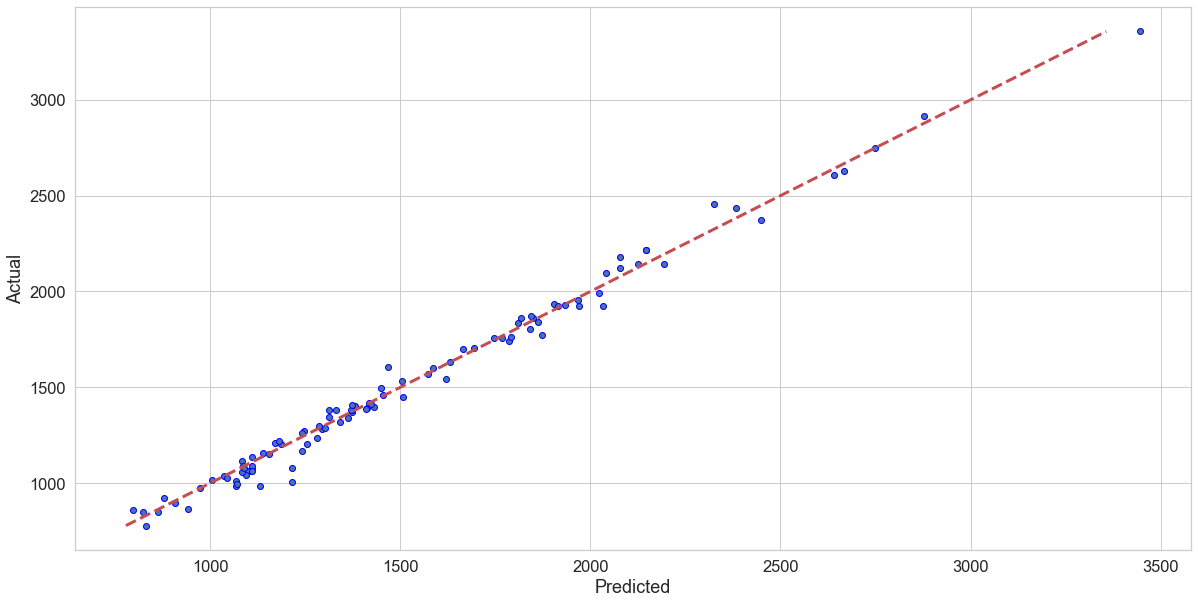

In [471]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(pre_out, out, edgecolors=(0, 0, 1))
ax.plot([my_min(out), my_maxi(out)], [my_min(out), my_maxi(out)], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [472]:
# model evaluation for testing set

mae = mean_absolute_error(test_y, predict_test)
mse = mean_squared_error(test_y, predict_test)
r2 = r2_score(test_y, predict_test)

print("The model performance for test set")
print("--------------------------------------")
print('MAE is {}'.format(round(mae, 3)))
print('MSE is {}'.format(round(mse, 3)))
print('RMSE is {}'.format(round(mse**(0.5), 3)))
print('R2 score is {}'.format(round(r2, 3)))

print('Adjusted R2 score is {}'.format(adj_rsqrd(test_df, r2)))

The model performance for test set
--------------------------------------
MAE is 44.001
MSE is 4787.228
RMSE is 69.19
R2 score is 0.988
Adjusted R2 score is 0.988


### We have achieved an adjusted R Squared value of 98.8% which is pretty close to 1, indicating our selected "Independent Variables" are highly correlated to our "Dependent Variable" and our model is able to predict very accurately.